In [1]:
#Importing the packages needed for this analysis
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi']= 400

In [2]:
tastingflavors = {'Spicy':['cocoa','clove', 'vanilla','pepper', 'saffron','nutmeg','licorice','menthol','cinnamon'],\
'Char':['ash','tar','toast','wood smoke','tobacco','fireplace','burnt food','grilled food'],\
'Sweet':['malt','brown sugar','candy','honey','caramel','molasses','burnt sugar','maple syrup','sweet'],\
'Nutty':['almond', 'peanut','walnut','chestnut','hazelnut', 'roasted nuts'],\
'Floral':['rose','hops','orchid','violet','jasmine','perfume','geranium','dandelion','honeysuckle','lily of the valley','orange blossom'],\
'Herbs':['thyme','parsley','cardamom','eucalyptus','fennel seed','coriander'],\
'Vegetables':['spinach','broccoli','zucchini','asparagus','garden peas','green pepper','squash blossom'],\
'Grass':['stems','straw','barnyard','grapeseed','fresh cut grass','grass'],\
'Wood':['evergreen','bark','cedar','resin','freshly cut wood','sawdust','wet wood','driftwood','green wood','cherry wood'],\
'Earth':['peat','moss','musty','leather','compost','wet earth','forest floor','decaying wood'],\
'Mineral':['salt', 'metalllic', 'wet rocks'],\
'Marine':['seawood','ocean air'],\
'Berry':['raspberry','strawberry','blackberry', 'black currant'],\
'Citrus':['lemon','orange','grapefruit','citrus zest'],\
'Tree Fruit':['peach','pear','apricot','apple','cooked fruit','dried fruit'],\
'Tropical':['mango','melon','lychee', 'banana','pineapple'],
'Malolactic':['butter']}

wheel = {'Earthy':['Wood','Earth','Mineral','Marine'],'Vegetal':['Grass','Vegetables','Herbs'],\
         'Fruity':['Berry','Citrus','Tree Fruit','Tropical']}


In [3]:
#reading a pickle file reading to pick up where i left off in case something fails or i start over
with open("tea_data.pkl", 'rb') as picklefile: 
    teareview_dict = pickle.load(picklefile)

In [4]:
#reading in the list of tea dictionaries, each being by itself
with open('items_data.pkl', 'rb') as picklefile:
    tea_list = pickle.load(picklefile)

In [5]:
#reading in the dict of users, user name as key, and 3 lists inside
with open('user_data.pkl', 'rb') as picklefile:

    user_list = pickle.load(picklefile)

In [6]:
tea_list[4]

{'Tea Name': 'Pu Er Vrac 28 (1998)',
 'Tea Brand': 'Maison des 3 Thes',
 'Tea Type': 'Pu-erh Tea',
 'Tea Ingredients': 'Not available',
 'Tea Flavors': '<dd class="empty">Not available',
 'Tea Reviews': ['C’est effectivement un bon Puerh, velouté, gras, sombre. Notes de tourbe, un peu sucré, il est généreux aux réinfusions.',
  'Brewed in a small teapot (20 cl). Good Pu-Erh.']}

In [7]:
new_list=[]
for i in tea_list:
    if i not in new_list:
        new_list.append(i)

In [8]:
import json
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client.tea_database


In [ ]:
#to large of a document to insert all at once.
users = db.users
post_id = users.insert_one(user_list).inserted_id

In [49]:
teas = db.teas

In [50]:
db.collection_names

<bound method Database.collection_names of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'tea_database')>

In [52]:
#inserting all the teas into mongodb
tearesults = teas.insert_many(tea_list)

AttributeError: 'InsertManyResult' object has no attribute 'inserted_id'

In [53]:
tearesults.inserted_ids

[ObjectId('5b0e256415f1942015cd421c'),
 ObjectId('5b0e256415f1942015cd421d'),
 ObjectId('5b0e256415f1942015cd421e'),
 ObjectId('5b0e256415f1942015cd421f'),
 ObjectId('5b0e256415f1942015cd4220'),
 ObjectId('5b0e256415f1942015cd4221'),
 ObjectId('5b0e256415f1942015cd4222'),
 ObjectId('5b0e256415f1942015cd4223'),
 ObjectId('5b0e256415f1942015cd4224'),
 ObjectId('5b0e256415f1942015cd4225'),
 ObjectId('5b0e256415f1942015cd4226'),
 ObjectId('5b0e256415f1942015cd4227'),
 ObjectId('5b0e256415f1942015cd4228'),
 ObjectId('5b0e256415f1942015cd4229'),
 ObjectId('5b0e256415f1942015cd422a'),
 ObjectId('5b0e256415f1942015cd422b'),
 ObjectId('5b0e256415f1942015cd422c'),
 ObjectId('5b0e256415f1942015cd422d'),
 ObjectId('5b0e256415f1942015cd422e'),
 ObjectId('5b0e256415f1942015cd422f'),
 ObjectId('5b0e256415f1942015cd4230'),
 ObjectId('5b0e256415f1942015cd4231'),
 ObjectId('5b0e256415f1942015cd4232'),
 ObjectId('5b0e256415f1942015cd4233'),
 ObjectId('5b0e256415f1942015cd4234'),
 ObjectId('5b0e256415f194

In [54]:
tea_list[0]

{'Tea Brand': 'Teaopia',
 'Tea Flavors': '<dd class="empty">Not available',
 'Tea Ingredients': 'Not available',
 'Tea Name': 'Tuo Cha Pu-erh',
 'Tea Reviews': ['A very rich tasting pu-erh. Teaopia’s little selection of pu-erh left me a bit skeptical, but I’m glad I gave this a try. The taste is earthy, with slight orangy undertones on the first infusion. The true orangy taste comes out on the second infusion. Definitely recommend this to any person who likes a strong cup of Black Tea, and who doesn’t mind something a little stronger than Orange Pekoe, and Yunan.The tea is also extremely high in Vitamin C.',
  'I think this has been discontinued. I don’t mind that.Steeped for seven minutes (not the “proper” way to do Pu-erh, but it’s the way I personally like all the other ones I’ve tried. Maybe I’ll give it another try and steep for far less time.None of the conspicuous fishiness that some have, but none of the complexity either. Tastes like soil and campfire ashes. A bit of sweetness

In [6]:
reviewcount = []
count =0
for i in teareview_dict:
    count=0
    for j in teareview_dict[i]: 
        count+=len(j['Tea Reviews'])
    reviewcount.append(count)


In [11]:
teareview_dict['Black Tea'][0]

{'Tea Name': 'Premium Taiwanese Assam',
 'Tea Ingredients': 'Black Tea Leaves',
 'Tea Flavors': 'Chocolate, Cream, Cocoa, Fruity, Malt, Brown Sugar, Burnt Sugar, Caramel, Dried Fruit, Molasses, Raisins, Baked Bread, Vanilla, Cinnamon, Honey, Cherry, Pastries, Sweet, Sweet Potatoes, Fig, Grain, Plums, Yams, Strawberry',
 'Tea Reviews': ['Happy Thanksgiving (Gratitude Day) to everyone in the World!!  I know Thanksgiving is an American holiday, but I hope everybody everywhere has things to be grateful for everyday. I think it’s important to take a few minutes at least once a day to be grateful for all that I have, all that I am, and all that I’m yet to be, and to wish for wonderful things in the lives of others as well.I started my day by making 3 pie crusts, all gluten free. One is for a pie that I’ve made for years called Chocolate Midnight (Originally Chocolate Almond Midnight because of a praline almond decorative topping I omitted, from the vegan Millenium Cookbook) It’s the most dec

In [338]:
tea_list[0]

{'Tea Brand': 'Teaopia',
 'Tea Flavors': '<dd class="empty">Not available',
 'Tea Ingredients': 'Not available',
 'Tea Name': 'Tuo Cha Pu-erh',
 'Tea Reviews': ['A very rich tasting pu-erh. Teaopia’s little selection of pu-erh left me a bit skeptical, but I’m glad I gave this a try. The taste is earthy, with slight orangy undertones on the first infusion. The true orangy taste comes out on the second infusion. Definitely recommend this to any person who likes a strong cup of Black Tea, and who doesn’t mind something a little stronger than Orange Pekoe, and Yunan.The tea is also extremely high in Vitamin C.',
  'I think this has been discontinued. I don’t mind that.Steeped for seven minutes (not the “proper” way to do Pu-erh, but it’s the way I personally like all the other ones I’ve tried. Maybe I’ll give it another try and steep for far less time.None of the conspicuous fishiness that some have, but none of the complexity either. Tastes like soil and campfire ashes. A bit of sweetness

In [6]:
itemdf = pd.DataFrame(tea_list)
newname=[]
import re

for i in itemdf['Tea Name']:
    line = re.sub('[!@#$\'\",]', '', i)
    newname.append(line)
itemdf['Tea Name'] = newname

In [37]:
itemdf.head()

Tea Brand                      Tea Flavors Tea Ingredients  \
0            Teaopia  <dd class="empty">Not available   Not available   
1         Narian Tea  <dd class="empty">Not available   Not available   
2           Bewley's  <dd class="empty">Not available   Not available   
3        Zingerman's  <dd class="empty">Not available   Not available   
4  Maison des 3 Thes  <dd class="empty">Not available   Not available   

                   Tea Name  \
0            Tuo Cha Pu-erh   
1  Genmaicha Brown Rice Tea   
2          Lapsang Souchong   
3           Moonlight White   
4      Pu Er Vrac 28 (1998)   

                                         Tea Reviews    Tea Type  
0  [A very rich tasting pu-erh. Teaopia’s little ...  Pu-erh Tea  
1  [Smooth with a nice nutty taste and aroma. Gre...   Green Tea  
2                                           [Grand.]   Black Tea  
3  [Sadly I think I’ve just encountered the first...   White Tea  
4  [C’est effectivement un bon Puerh, velouté, gr...  Pu-erh Tea

In [7]:
userdf = pd.DataFrame.from_dict(user_list, orient='index')
userdf.columns = ['tea links','Tea Names', 'Score']

In [8]:
#Creates a feature for each tea, and fills with 0 that will be filled in with actual values later, classic SVD approach
"""
for i in itemdf['Tea Name']:
    userdf[i] = np.zeros((len(userdf),1))"""

"\nfor i in itemdf['Tea Name']:\n    userdf[i] = np.zeros((len(userdf),1))"

In [9]:
userdf.head()

tea links  \
/Megan       [/teas/tazo/144-berryblossom-white, /teas/adag...   
/gongfugirl  [/teas/tazo/144-berryblossom-white, /teas/adag...   
/nerditea    [/teas/tazo/144-berryblossom-white, /teas/adag...   
/selina      [/teas/tazo/144-berryblossom-white, /teas/adag...   
/cretcre     [/teas/tazo/144-berryblossom-white, /teas/adag...   

                                                     Tea Names  \
/Megan       [Berryblossom White, Blood Orange, Cinnamon Ap...   
/gongfugirl  [Yunnan Golden Buds, Jade Cloud, Ancient Emera...   
/nerditea    [Tung Ting Jade, Organic Cherry Blossom White ...   
/selina      [Green Tea Mint, Tea's Tea Golden Oolong, Vani...   
/cretcre                                      [Pu-erh Classic]   

                                                         Score  
/Megan       [/span, 80, /span, 75, 72, 70, 75, 75, 79, 25,...  
/gongfugirl  [/span, /span, /span, /span, /span, /span, /sp...  
/nerditea    [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...  
/selina                                 [/span, 75, 75, /span]  
/cretcre                                                  [75]

In [36]:
"""for user,i in zip(userdf['Tea Names'], userdf.index):
    for ind,j in enumerate(user):
        teascore= userdf.loc[i,'Score'][ind]
        if teascore=='/span':
            teascore=0
        teascore_list.append(teascore)
userdf = userdf.fillna(0)"""

"for user,i in zip(userdf['Tea Names'], userdf.index):\n    for ind,j in enumerate(user):\n        teascore= userdf.loc[i,'Score'][ind]\n        if teascore=='/span':\n            teascore=0\n        teascore_list.append(teascore)\nuserdf = userdf.fillna(0)"

In [13]:
userdf.head()

tea links  \
/Megan       [/teas/tazo/144-berryblossom-white, /teas/adag...   
/gongfugirl  [/teas/tazo/144-berryblossom-white, /teas/adag...   
/nerditea    [/teas/tazo/144-berryblossom-white, /teas/adag...   
/selina      [/teas/tazo/144-berryblossom-white, /teas/adag...   
/cretcre     [/teas/tazo/144-berryblossom-white, /teas/adag...   

                                                     Tea Names  \
/Megan       [Berryblossom White, Blood Orange, Cinnamon Ap...   
/gongfugirl  [Yunnan Golden Buds, Jade Cloud, Ancient Emera...   
/nerditea    [Tung Ting Jade, Organic Cherry Blossom White ...   
/selina      [Green Tea Mint, Tea's Tea Golden Oolong, Vani...   
/cretcre                                      [Pu-erh Classic]   

                                                         Score  
/Megan       [/span, 80, /span, 75, 72, 70, 75, 75, 79, 25,...  
/gongfugirl  [/span, /span, /span, /span, /span, /span, /sp...  
/nerditea    [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...  
/selina                                 [/span, 75, 75, /span]  
/cretcre                                                  [75]

## More Data Wrangling

Now that I have the dataframe imported, I am going to use NLP to work with the different reviews on certain teas to create more insights and set it up for unsupervised learning.

### Tasting Considerations
* Aroma: The odor of the tea liquor, also called the nose or fragrance. A complex aroma is often described as a bouquet. 
* Astringency: A lively and mouth-drying effect on the tongue. Not bitter, but a clean and refreshing quality. The sensation of astringency is caused by a reaction between polyphenols (tannins) and the protein in saliva. 
* Body: The tactile aspect of tea’s weight and substance in the mouth, variously subcategorized as light, medium, or full; also known as fullness. 
* Bright: A lively, clean style that refreshes the palate. 
* Character: A tea’s signature attributes depending upon origin, whether of its country, region or type. 
* Clean: Indicates purity of flavor and an absence of any off-tastes. 
* Finish: The lasting taste on your tongue after swallowing the tea. 
* Flowery: A floral nose or flavor associated with high grade teas. 
* Full: References a positive sensation of body and good heft; indicates a well-made tea, possessing color, strength, substance and roundness. 
* Malty: A sweet malt flavor that is characteristic of Assam black teas. 
* Muscatel: A flavor reminiscent of grapes, most often used to describe an exceptional characteristic found in the liquors of the finest Darjeelings. 
* Smooth: Round-bodied, fine-drinking teas. 
* Soft: Smooth, lush, and subsequently often (but not necessarily) timid in flavor; not a negative term. 
* Thick: Describes liquor having substance, but not necessarily strength. 
* Vegetal: A characteristic of green teas that might include grassy, herby or marine flavors.

In [44]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
teareview_dict['Green Tea'][0].keys()

dict_keys(['Tea Name', 'Tea Ingredients', 'Tea Flavors', 'Tea Reviews'])

### Polarity Score
Using TextBlob, I will be creating a polarity score for each review.  This is to help weight the reviews if needed. 

In [20]:
polarityscore = []
for i in teareview_dict:
    for j in teareview_dict[i]: 
        for review in j['Tea Reviews']:
            q = TextBlob(review)
            polarityscore.append(q.sentiment.polarity)
        j['Polarity']=polarityscore
        polarityscore=[]

In [21]:
teareview_dict['Black Tea'][0]['Polarity']

[0.24780701754385964,
 0.215,
 0.22731829573934836,
 0.12239389776889774,
 0.3666666666666667,
 0.32083333333333336,
 0.012499999999999999,
 0.14273268398268396,
 0.13819444444444445,
 0.2731600935828877]

### Proportion Flavor Wheel and Mouthfeel

Using the flavor wheel found online, I will create a flavor profile for each tea. I will need to use 1 and 2 n-grams and the tastingflavors dictionary.

I also want to get any 'mouthfeel' data to see what added bonus it could give to the tea. 

In [14]:
#creating flavor profile based on the tastingflavors dict, stored as proportions
def getProp(text1):
    text1=TextBlob(text1)
    count=0
    tot_count=0
    proportion_dict = {}
    for i in tastingflavors:
        count=0
        adjlist=[]
        for j in text1.tags:
            if j[1]=='JJ' or j[1]=='JJR'or j[1]=='JJS' or j[1]=='NN'or j[1]=='NNP'or j[1]=='NNS':
                abb = re.sub("y","", i[0])
                if(i[0] !=abb):
                    adjlist.append(abb.lower())
                    adjlist.append(j[0].lower())
                else:
                    adjlist.append(j[0].lower())
        for k in adjlist:
            if k in tastingflavors[i]:
                count+=1
        for k in text1.ngrams(n=2):
            if ' '.join(k.lower()) in tastingflavors[i]:
                count+=1
        tot_count+=count
        proportion_dict[i]=count
    if tot_count!=0:
        for i in proportion_dict:
            proportion_dict[i] = proportion_dict[i]/tot_count
        
    return proportion_dict, adjlist

In [15]:
#function pulling out mouthfeel data and filtering out unnecessary data, input is the revlist
def getReviews(revlist):
    supertext=""
    mouthfeel = ''
    for i in revlist:
        supertext += (' '+ i)
        if re.findall(r"([^[.!]]*?mouthfeel[^.]*\.)",i):
            mouthfeel=' '.join((re.findall(r"([^.!,]*?mouthfeel[^.!,]*\.)",i)))

    supertext = re.sub("[’,;:–…]","", supertext).replace("(", '').replace(".", ' ').replace("!", ' ').replace(")", '')
    supertext= re.sub("(-)"," ", supertext)
    supertext= re.sub("(chocolate)","cocoa", supertext)
    word_tokens = word_tokenize(supertext)
    sentence = ''
    mouthblob = TextBlob(mouthfeel)
    mouthadj = []
    for i in mouthblob.tags:
        if i[1]=='JJ' or i[1]=='JJR'or i[1]=='JJS':
            mouthadj.append(i[0])
    
    
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    for i in filtered_sentence:
        sentence += (' '+i)
    return supertext, mouthadj

In [ ]:
#creating a flavor profile from both reviews and flavors filled in by customers, also makign a mouthfeel profile if found
newdictlist = []
for i in teareview_dict:
    newdictlist = []
    for j in range(len(teareview_dict[i])):
        flavtext = ''
        reviewtext, mouthfeel= getReviews(teareview_dict[i][j]['Tea Reviews'])
        proportions = getProp(reviewtext)
        if teareview_dict[i][j]['Tea Flavors']:
            flavtext = teareview_dict[i][j]['Tea Flavors']
        custproportions= getProp(flavtext)
        dict2 = teareview_dict[i][j].copy()
        dict2['Mouthfeel']=mouthfeel
        dict2['Flavor Profile Cust']=custproportions
        dict2['Flavor Profile Reviews']=proportions
        dict2['Reviews Supertext']=reviewtext
        newdictlist.append(dict2)
    teareview_dict[i] = newdictlist

In [ ]:
"""with open('totstea_data.pkl', 'wb') as picklefile:
    pickle.dump(teareview_dict, picklefile)"""

In [60]:
from pprint import pprint
for i in teareview_dict['Green Tea']:
    pprint(i)

{'Flavor Profile Cust': {'Berry': 0.0,
                         'Char': 0.0,
                         'Citrus': 0.0,
                         'Earth': 0.05263157894736842,
                         'Floral': 0.0,
                         'Grass': 0.0,
                         'Herbs': 0.0,
                         'Malolactic': 0.8947368421052632,
                         'Marine': 0.0,
                         'Mineral': 0.0,
                         'Nutty': 0.0,
                         'Spicy': 0.05263157894736842,
                         'Sweet': 0.0,
                         'Tree Fruit': 0.0,
                         'Tropical': 0.0,
                         'Vegetables': 0.0,
                         'Wood': 0.0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.057971014492753624,
                            'Citrus': 0.0,
                            'Earth': 0.014492753623188406,
                            'Floral': 0.14492753623188406,
       

                 'and fresh on the tongue. It has the usual taste elements of '
                 'a good-quality fuka as well. Excellent, but pricey.First '
                 'infusion – 3 g. per 8 oz water, 65 deg., 3:00 min.Second '
                 'infusion – 3 g. per 8 oz. water, 65 deg., 10:00+ min.',
                 'As always, I love Mellow Monk. This tea is delicious! It has '
                 'a stronger, more refined flavor than the Top Leaf. It’s more '
                 'vegetal, and has mild berry notes, which I love. It’s '
                 'buttery, and has a creamy texture. The color is a beautiful, '
                 'and deep shade of green. I would definately order more of '
                 'it, and keep it for those special times.::Edit:: I just '
                 'decided to try this in my gaiwan, instead of my kyusu, and '
                 'wow! If I’d known that tea could taste this good, I would’ve '
                 'been living off the stuff! I had to bump th

                      'target="_blank">https//instagram '
                      'com/p/1wcWpRwh33/</a><a href="https//instagram '
                      'com/p/1wdSdSQh5K/" rel="nofollow" '
                      'target="_blank">https//instagram '
                      'com/p/1wdSdSQh5K/</a><a href="https//instagram '
                      'com/p/1weEizQh6H/" rel="nofollow" '
                      'target="_blank">https//instagram com/p/1weEizQh6H/</a>',
 'Tea Flavors': 'Asparagus, Butter, Chestnut, Grass, Hay, Honey, Lettuce, '
                'Malt, Mineral, Pine, Seaweed, Smoke, Umami, Zucchini, '
                'Artichoke, Floral, Green, Kale, Nectar, Nutty, Smooth',
 'Tea Ingredients': 'Green Tea',
 'Tea Name': 'High Mountain Xinyang Maojian',
 'Tea Reviews': ['This was yet another back-of-the-tea cabinet discovery. I '
                 'knew I had bought an ounce of this last year, but '
                 'apparently, I had forgotten about it entirely. It was all '
               

                      'on the package  it says “Mental Focus”  I soooo needed '
                      'that today My dear Sororitea Sister LiberTeas will tell '
                      'yaIve had a flighty morning and technology hasnt been '
                      'my friend  LOLAnyhowthis SHOULD help me get back on '
                      'track  I HOPE This is really good matcha  Its velvety '
                      'and pleasant from start to finish  ANDit stays mixed '
                      'the whole cuppa  It froths up and stays mixed well '
                      'throughout with little to no chalky end cup  YAY  Today '
                      'I tried out the Ceremonial Grade Matcha from Aiya '
                      'hopefully tomorrow I will get to the Organic Ceremonial '
                      'Grade  Here are my thoughtsWhile whisking this one it '
                      'was evident how different it was from the Premium Grade '
                      'Matcha  It was thicker  VERY f

                      'buttered green vegetables but the “buttery” sensation '
                      'soon dissipates and shifts to a sweet vegetal sort of '
                      'flavor  Grassy but not bitter  Brothy  Savory and sweet '
                      'at the same time — how does it manage that? The flavors '
                      'are really strong and keep shifting from vegetal and '
                      'grassy to sweet and almost herbal and the flavors are '
                      'long lasting I can still taste this tea in a good way '
                      'several minutes after drinking it  Its delicious like '
                      'springtime in a cup The first time I brewed this I let '
                      'it sit for just one minute too long and it came out a '
                      'tad astringent so I would say this is a tea that is '
                      'indeed fussy about brew times  But if you follow the '
                      'directions on the package yo

                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.2225,
              0.22337962962962962,
              0.31986394557823133,
              0.6,
              0.30833333333333335,
              0.10520833333333333,
              1.0,
              0.6071428571428571,
              0.6083333333333333],
 'Reviews Supertext': ' Ever since seeing the excellent documentary “All In '
                      'This Tea” Ive wanted to try this one and I finally got '
                      'the chance when a local Chinese friend of mine brought '
                      'some in to my shoppe for blending  During the '
                      'aforementioned documentary film renown tea master '
                      'Gaetano Kazuo Maida does a public tasting of this '
                      'specfic tea and describes the experience as “vegetal '
                      'without being flowery earthy seaweed ” Well hes got a '
        

                         'Malolactic': 0,
                         'Marine': 0,
                         'Mineral': 0,
                         'Nutty': 0,
                         'Spicy': 0,
                         'Sweet': 0,
                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.7692307692307693,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.23076923076923078,
                       

                         'Nutty': 0,
                         'Spicy': 0,
                         'Sweet': 0,
                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.5,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.1875,
                            'Tree Fruit': 0.3125,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            

                      'cant wait to try more flavors from Red Leaf  I have a '
                      'traditional matcha set with plain matcha on its way and '
                      'I am now even more eager to try  Somehow I am going to '
                      'have to fit drinking this caramel goodness in daily  I '
                      'actually feel more energetic and high spirited and I am '
                      'attributing to the matchaccino  You can get this '
                      'scrumptious caramel Matchaccino at Red Leaf Tea here <a '
                      'href="http//www redleaftea com/matchaccino/caramel '
                      'matchaccino html" rel="nofollow" '
                      'target="_blank">http//www redleaftea '
                      'com/matchaccino/caramel matchaccino html</a>Also my '
                      'boyfriends response was “I could drink this  Much '
                      'better than all these other girl teas you have been '
                   

                            'Tree Fruit': 0.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.12333333333333334,
              0.08446969696969697,
              0.21959905660377357,
              -0.0009999999999999942,
              0.2566666666666666,
              0.47980769230769227,
              0.22600694444444447,
              0.206781045751634,
              0.3859375,
              0.05],
 'Reviews Supertext': ' I havent had this one in a while so I made a pot of '
                      'it  It was very refreshing since Ive had a lot of '
                      'flavored teas recently  The subtle flavor of pine is '
                      'just lovely with the buttery green tea  Pretty sure my '
                      'feed isnt working here but oh well This was a sad '
                      '<strong>sipdown</strong> but I appreciated the chance '
          

                      'com/s/ref=nb_sb_noss?url=search alias%3Daps&ampfield '
                      'keywords=japanese+tea+doll+canister&ampx=0&ampy=0" '
                      'rel="nofollow" target="_blank">http//www amazon '
                      'com/s/ref=nb_sb_noss?url=search alias%3Daps&ampfield '
                      'keywords=japanese+tea+doll+canister&ampx=0&ampy=0</a> '
                      'and this one<a href="http//www amazon com/White Hakata '
                      'Doll Canister '
                      'Japan/dp/B004AMBMUQ/ref=sr_1_fkmr2_1?ie=UTF8&ampqid=1297976451&ampsr=8 '
                      '1 fkmr2" rel="nofollow" target="_blank">http//www '
                      'amazon com/White Hakata Doll Canister '
                      'Japan/dp/B004AMBMUQ/ref=sr_1_fkmr2_1?ie=UTF8&ampqid=1297976451&ampsr=8 '
                      '1 fkmr2</a> And I just ordered the sakura sencha from '
                      'Dens tea  I am so very anxious to try some  Their '
             

                      'this?? There was such a smoothness on my palate but '
                      'after I swallowed the tea <strong>POP   BANG   POW  '
                      '</strong> The tea recharged on my palate with a mild '
                      'tartness  That was another first for me &amp nothing '
                      'short of AMAZING  My second cup [7 minutes at 212F '
                      'showcased a lemony tart aroma between 4 5 minutes  One '
                      'cone was still clinging together so I broke the leaves '
                      'apart hoping to achieve more aroma and flavor  There '
                      'was deeper tart lemon and artichoke aromas with some '
                      'sweetness  Wet leaves also gave deeper aromas of lemon '
                      'artichoke dill and woods  The longer steep brought out '
                      'light smokey notes as well While still quite light the '
                      'cup turned a deeper yellow  Slightl

                         'Spicy': 0,
                         'Sweet': 0,
                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0,
                            'Char': 0,
                            'Citrus': 0,
                            'Earth': 0,
                            'Floral': 0,
                            'Grass': 0,
                            'Herbs': 0,
                            'Malolactic': 0,
                            'Marine': 0,
                            'Mineral': 0,
                            'Nutty': 0,
                            'Spicy': 0,
                            'Sweet': 0,
                            'Tree Fruit': 0,
                            'Tropical': 0,
                            'Vegetables': 0,
                            'Wood': 0},
 'Mouthfeel': [],
 'Polarity': [0.5857142857142856],
 'Reviews 

                      'target="_blank">http//sororiteasisters '
                      'com/2014/04/21/organic nonpareil qian dragon well long '
                      'jing green tea teavivre/</a> Thank you so much for '
                      'being so generous Teavivre  Wow  I always appreciate it '
                      'so much  It really makes my day or week to receive a '
                      'package of teas all the way from China  A sample '
                      'package just in time for triple review points  I '
                      'promised Id try this one as soon as I got it because I '
                      'insisted they wait to send it with the other teas they '
                      'wanted to send  As fresh as possible  Hopefully it '
                      'didnt affect the teas too much sitting in the 95 degree '
                      'mailbox for an hour before I rescued them and probably '
                      'warmer because it is a brown mailbox  The dry leaves 

                      'its still perfectly drinkable just different It has '
                      'such a unique pure flavor that Im struggling to '
                      'describe it with any words other than “Strong '
                      'Dragonwell ”Dragonwell is my favorite kind of green tea '
                      'though  I havent been drinking looseleaf for very long '
                      'so most of my teas have been come and go  Dragonwell '
                      'Teavana variety is the only one Ive repurchased over '
                      'and over I trained a girl at work today because Im '
                      'apparently the star cashier  Its not because Im '
                      'particularly good at my job Ive just been there longer '
                      'and I actually <em>do</em> my job as opposed to some of '
                      'the boys / high school kids who just kind of stand up '
                      'there and text the whole time  Training is lovely 

                 'like green tea as much as others!).\n'
                 '\n'
                 '<p class="flavor-names">Flavors: Plants\n'
                 '</div>, <div class="text">\n',
                 'Green. Vegetable. Creamy. Ehhh sorry, not for me, '
                 '<strong>Albertocanfly</strong>! :(',
                 'Thank you to <strong>Bonnie</strong> for sending me this '
                 'tea. It has languished in the cupboard until today when I '
                 'found it tucked at the back. The leaf is dark green and '
                 'twisty. It brews up to an olive green leaf and a pale soup. '
                 'The colours are great and the aroma of the liquor is green '
                 'beans and spinach. The aroma carries into the tea with '
                 'vegetal notes, green beans and a touch of spinach. It is '
                 'creamy and quite filling. Thank you, Bonnie. This is a good '
                 'green tea and quite different from most that I

                 'one out this afternoon, though I am a little wired already '
                 'from having some gyokuro matcha with lunch. I followed the '
                 'MM instructions which said to steep for 2 minutes @ 170F — I '
                 'guesstimated.There’s a TON of dried yuzu peel in this '
                 'package. My cup ended up being a light yellow so I was '
                 'somewhat worried about the flavor, but it’s delightful, IMO. '
                 'The yuzu lends a grapfruity/lemon note and I am definitely '
                 'picking up on the rose element. It’s got a lightly sweet and '
                 'tart flavor and the green tea is just lending a slightly '
                 'vegetal quality with a hint of berry. Hmm. This is good, I '
                 'like it! Very refreshing for the afternoon. I bet this would '
                 'also be good iced or mixed with some sparkling water as an '
                 'apertif.',
                 'Oh my! T

                 'Laoshan Black.I can’t wait to try the Autumn Harvest Laoshan '
                 'Dragonwell Style Laoshan Green with her and see if she can '
                 'pick out the cherry notes in Mrs. Li’s Dragonwell. We both '
                 'got glass tumblers with flat strainers at the top for '
                 'Christmas so we can sip together all day. Unfortunately the '
                 'Zojirushi is not going to work out for her and I need to '
                 'find another variable temperature kettle that has a 170-175 '
                 'setting, will hold that temperature but does not '
                 'automatically bring the water up to a boil first. But that’s '
                 'more for the forums.',
                 'As noted by Terri this version does not look like the '
                 'picture. It is flat rolled into long dark brittle twists. '
                 'This tea does some funky stuff. First off, I don’t know why '
                 'one steep

{'Flavor Profile Cust': {'Berry': 0.0,
                         'Char': 0.0,
                         'Citrus': 0.0,
                         'Earth': 0.0,
                         'Floral': 0.0,
                         'Grass': 0.0,
                         'Herbs': 0.0,
                         'Malolactic': 0.0,
                         'Marine': 0.0,
                         'Mineral': 0.0,
                         'Nutty': 0.0,
                         'Spicy': 0.0,
                         'Sweet': 0.0,
                         'Tree Fruit': 0.0,
                         'Tropical': 0.0,
                         'Vegetables': 1.0,
                         'Wood': 0.0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.6451612903225806,
                            'Herbs': 0.0,
     

                 'enough to recommend one over the other. The first steep had '
                 'a floral and vaguely fruity taste and a nice aroma. After '
                 'the first steep I had to run out and do errands, so I left '
                 'it in the strainer to hang out until I returned. Upon '
                 'steeping it again, the tea had the strangest taste, jasmine '
                 'at first and then resin and pine needles. Whaaaaaaaat?A '
                 'picture of Butterfly Jasmine hanging out in my new mug: <a '
                 'href="http://instagr.am/p/SgqguXykX9/" rel="nofollow" '
                 'target="_blank">http://instagr.am/p/SgqguXykX9/</a>',
                 'Jasmine-scented green tea is the crutch by which I hobble '
                 'through winter. My daily poison is Jasmine Pearls or Dragon '
                 'Tears, and so all Jasmine-scented green teas are rated by '
                 'how well they compare to that standard.Jasmine Butterf

                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.0,
                            'Tree Fruit': 1.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': ['full', 'fantastic', 'doesn'],
 'Polarity': [0.4020833333333334, 0.23030303030303034, 1.0, 0.170018315018315],
 'Reviews Supertext': ' Dragonwell is probably my favorite tea to drink and '
                      'this one from Red Blossom Tea is delicious  The dry '
                      'le

 'Tea Reviews': ['Another tea from the Here’s Hoping TTB. It’s been awhile '
                 'since I had a Gyokuro. I do enjoy them. It’s a very pale '
                 'infusion, a very sweet spring green color. The tea is like a '
                 'thin Matcha, very green &amp; delicious.',
                 'Somewhat sweet but still brothy, too! This is very '
                 'delicious! I’ve noticed it can get grassier tasting if '
                 'infused for longer than a minute. On the other hand 2nd '
                 'infusions and possible 3rd infusions are somewhat '
                 'lemony…which I enjoyed, too! A versatile cuppa. Yum!',
                 'Sipdown (120)! I used up the last of this leaf in a cold '
                 'brew since I don’t really drink too much hot tea these days. '
                 'I left it in the fridge for about 9-10 hours, which in '
                 'hindsight was probably too long because there was a bit of '
                 'bitternes

                 'infusion was probably my favorite, highlighting the buttery '
                 'taste I can’t get enough of. The third was like the second, '
                 'but less potent.Steeping notes: 3oz. with 2 g 1. 145* at 90 '
                 'sec. 2. 160* at 60 sec. 3. 170* at 90 sec.',
                 'I usually choose a strong black tea for my morning cup, but '
                 'we were out of town all weekend and don’t have any milk in '
                 'the fridge, so I’m happily settling with this green tea '
                 'instead. It gives me a chance to get to some of my green tea '
                 'samples, like this one is from Mercuryhime. The dry leaves '
                 'smell slightly sweet and grassy. The tea itself has a '
                 'vegetal aroma. I usually tend to choose flavored green teas, '
                 'so this one was bit of a surprise to me. It has a fresh '
                 'seaweed flavor with a sweet finish. There is a a stro

 'Tea Ingredients': 'Not available',
 'Tea Name': 'Chiran Sencha',
 'Tea Reviews': ['An excellent first infusion followed by a very pleasant '
                 'second make this a great tea. The third infusion is nothing '
                 'special, but third infusions rarely are for me in the world '
                 'of senchas.First infusion — 5 g. per 8 oz. water, 60 deg., 1 '
                 'min.Second infusion — 5 g. per 8 oz. water, 60 deg., 1 '
                 'min.Third infusion — 5 g. per 8 oz. water, 60 deg., 5+ min.',
                 'O-Cha’s Chiran Sencha (which I’m drinking here in Shincha '
                 'form) is a deep steamed Fukamushi tea that’s made of fresh '
                 'leaves from the Yutaka Midori bush. It’s an easy brewer that '
                 'tastes great extra-strong, but for this review I did a '
                 '“proper” brew of 4g to 4oz water in my tiny Banko '
                 'houhin.First (155*/ 90 secs): Bold aroma — I just love how '

                 'any sense. And I might very well be imagining this but it '
                 'also seems fruit-y, red berry-ish, to me.Really lovely tea\n'
                 '\n'
                 '<p class="flavor-names">Flavors: Menthol, Violet\n'
                 '</div>, <div class="text">\n',
                 'This tea is my first Mariage et Frères. The odour was not '
                 'convincing but I’m appreciating the deepnss of the violet '
                 'taste.']}
{'Flavor Profile Cust': {'Berry': 0.0,
                         'Char': 0.0,
                         'Citrus': 0.0,
                         'Earth': 0.0,
                         'Floral': 0.0,
                         'Grass': 1.0,
                         'Herbs': 0.0,
                         'Malolactic': 0.0,
                         'Marine': 0.0,
                         'Mineral': 0.0,
                         'Nutty': 0.0,
                         'Spicy': 0.0,
                         'Sweet': 0.0,
 

                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.0,
                            'Tree Fruit': 1.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.07897816469245042,
              0.4357142857142858,
              0.23696428571428568,
              0.26988095238095233,
              0.01491228070175438],
 'Reviews Supertext': ' Im craving this again  It is my favorite from the new '
                      'Zodiac series  For me it has the right balance of '
                      'green/white tea + the faint taste of apples and mint  I '
                      'truly enjoy this Ive decided not to rate teas anymore  '
                      'When I drink tea I like to go with the flow just '
                      'experiencing the taste and smell without devising some '
                      '“object

                      'expensive $22 for 50g  If price isnt an issue for you '
                      'Id highly recommend checking this out even if you dont '
                      'normally like green tea  I just got this in the order '
                      'this week and Im drinking it for the first time right '
                      'now  Im logging it in but I dont have time for a proper '
                      'review  All I can say at this point that its a divine '
                      'tea  I love it ',
 'Tea Flavors': 'Butter, Spinach, Vegetable Broth, Floral, Forest Floor, '
                'Green, Ocean Air, Ocean Breeze, Seaweed, Vegetables, Vegetal, '
                'Creamy, Earth, Grass, Sweet, warm grass, Artichoke, Green '
                'Beans, Bok Choy',
 'Tea Ingredients': 'Green Tea Leaves',
 'Tea Name': 'Gyokuro Yamashiro',
 'Tea Reviews': ['Top o’ the mornin’! Happy St. Patrick’s Day steepsters! I am '
                 'going to try to just drink green teas tod

                      'the pitcher I seem to feel like my afternoon yesterday '
                      'became a bit better after indulging in some love spell  '
                      'It had the perfect hint of energy to provide the '
                      'consumer with its fruity flavours  Drinking the tea '
                      'helps you sit back and think of a hot vacation getaway '
                      'on a Caribbean island  A perfect time to daydream and '
                      'visit your fantasy place  Only to step back into '
                      'reality after the last drop in your teacup <a '
                      'href="http//www theteacupoflife blogspot ca" '
                      'rel="nofollow" target="_blank">www theteacupoflife '
                      'blogspot ca</a> Its about time I write a positive '
                      'review on here so I may as well start with this This '
                      'tea is not perfect because lets be honest here nothing '
     

                      '</div> <div class="text">\n'
                      ' I had both the 2015 and 2016 version of this tea I '
                      'brewed the 2015 as the given parameters  5g/235ml 80C '
                      'water 30 seconds +10 seconds for each additional '
                      'brewing  It was very delicate light and vegetale  No '
                      'nuttiness like most high end Longjing that I have had  '
                      'It had notes of jasmine elderberry melon sencha and '
                      'lilacs  I think this tea was better than the 2016  The '
                      'leaves had more fuzzies the picking standard was higher '
                      'and the liquor more complex  It never got bitter I '
                      'brewed the 2016 grandpa style  I used 2 5g/350ml  I '
                      'used 80C water and topped up when my glass was 2/3rds '
                      'full  It was sweet lightly vegetale and had a light '
             

                      'lot time too  My husband says its like we hacked the '
                      'Matrix or something  Ya know the let down sometimes '
                      'between then you smell the dry leaves and when you '
                      'smell it steeping? That definitely did not happen with '
                      'this one  Absolutely intoxicating aroma both dry and '
                      'steeping and taste  Im no expert but it seems like the '
                      'rosemary has a lot to do with it  I bought my sister a '
                      'few  ozs and she loves it too  Its became one of my '
                      'staples  I really love this as a green tea  If you are '
                      'not a “green tea person” you should try this one  The '
                      'lemon does stand out but you can taste the undertones '
                      'of roses and sage not a bad morning detox tea I think  '
                      'Steep for under 60 seconds for a 

                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.25,
                            'Spicy': 0.1875,
                            'Sweet': 0.5625,
                            'Tree Fruit': 0.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.3500901875901876, 0.15485119047619048],
 'Reviews Supertext': ' The 2015 crop of Meijiawu has arrived  This years '
                      'batch is exceptional  All of the positive aspects of a '
                      'traditional Lung Ching are intensified in this

                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.45454545454545453,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.5454545454545454,
                            'Tree Fruit': 0.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.27999999999999997, 0.24687500000000004

                         'Herbs': 0,
                         'Malolactic': 0,
                         'Marine': 0,
                         'Mineral': 0,
                         'Nutty': 0,
                         'Spicy': 0,
                         'Sweet': 0,
                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.0,
                 

                      'for its own strengths The dry smell from the bag is '
                      'undeniably of cocoa   of cocao nibs in particular  '
                      'Thats somethig I find to be consistant across all Lao '
                      'Shan teas in recent memory  I wonder why I never '
                      'noticed that in Qingdao? Probably because I was living '
                      'there so I never took the time to stick my face in the '
                      'bags and smell and appreciate  Also  no cocoa in '
                      'Qingdao[ *   so maybe I lost my context  Why cocoa? '
                      'Probably has something to do with that distinctive '
                      'beany Lao Shan taste Consulting my notes I see that the '
                      'steeped leaves have a “delicious smell ” Hmm usually I '
                      'write more but what can you say to that? Must have kept '
                      'me from writing anything else The taste is

                 'Thanks to a sample from Stacy at Butiki, I am getting to try '
                 'one of the top Chinese green teas, and it delivers! Stacy’s '
                 'description on the website is on target. When steeped, it '
                 'produces a clear, very pale yellow liquor with a sweetly '
                 'floral scent. The flavor is delicate and has a mildly nutty '
                 'and maybe slightly buttery element. This is a clean and '
                 'refreshing tea without any astringency. I really like it. '
                 'Now, I’m going to have some of that Butiki Creamy Eggnog '
                 'tea, which uses this as a base.',
                 'Now for a huangshan mao feng-athon! Both from Butiki, for '
                 'this round it’s organic vs. wild. They are visually distinct '
                 'which isn’t surprising, and both are pretty (the wild one a '
                 'bit more so maybe), with gorgeous color and shape. They both '
 

                            'Spicy': 0.0,
                            'Sweet': 1.0,
                            'Tree Fruit': 0.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.261301247771836,
              0.3760416666666666,
              0.13729024943310655,
              0.3327604166666666,
              0.4333333333333333],
 'Reviews Supertext': ' This aroma of this one before and while infusing '
                      'reminds me of coconut cookies  A wonderful smell '
                      'indeed  The Green Tea is a powerful one and a tad on '
                      'the grassier side of things but the coconut brings this '
                      'to a whole new level  While its sweet and tropical and '
                      'nearly cookie like its a unique taste and glad White '
                      'August Tea has this one available  In addition the '
    

 'Tea Reviews': ['This is my first known experience with a Kyobancha … it is '
                 'sweet and toasty, reminding me a bit of a cross between a '
                 'white tea and a Houjicha. It is roasty-toasty like a '
                 'houjicha, and light and sweet like a white tea.The sweetness '
                 'here reminds me a bit of raw sugar cane, it is so sweet and '
                 'yummy. The roasted flavor is slightly nutty, and there is '
                 'very little vegetative tone to this tea … it’s slightly '
                 'vegetal … a hay-like vegetal tone … but it is barely there. '
                 'This tea is light in body and texture as well as taste … and '
                 'it is so lovely … relaxing to sip!I like this a lot!',
                 'Loose Appearance: full bancha leaf, natural breaks, olive '
                 'brown Aroma when Dry: earthy, slight spice, sweet After '
                 'water is first poured: buttery, earthy At end of 

                      'but it speeds ur metabolism  I would include in a tea '
                      'swap as its flown all the way from Singapore It tastes '
                      'good if you blend it with another fruit or herbal tea',
 'Tea Flavors': '<dd class="empty">Not available',
 'Tea Ingredients': 'Not available',
 'Tea Name': 'Moringa',
 'Tea Reviews': ['This bag just came in the mail and I was much anticipating '
                 'the sensation of warming and hot tea. This doesn’t only make '
                 'u feel warmer by tasting as a sencha but it speeds ur '
                 'metabolism! I would include in a tea swap as it’s flown all '
                 'the way from Singapore',
                 'It tastes good if you blend it with another fruit or herbal '
                 'tea']}
{'Flavor Profile Cust': {'Berry': 0,
                         'Char': 0,
                         'Citrus': 0,
                         'Earth': 0,
                         'Floral': 0,
  

                            'Char': 0.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.021739130434782608,
                            'Tree Fruit': 0.9782608695652174,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': ['light', 'vegetative'],
 'Polarity': [0.35757575757575755, 0.1519293924466338, 0.23080000000000003],
 'Reviews Supertext': ' The aroma is amazing for this tea  It smells so '
                      'strong  so much like fresh peaches and apricots my '
        

 'Polarity': [0.31904761904761897,
              0.018295454545454535,
              0.351996336996337,
              0.2532738095238096],
 'Reviews Supertext': ' How can a tea be so delicate and so robust at the same '
                      'time? Gorgeous deep molasses flavor that tastes rich '
                      'steep after steep  Im on number 4 right now and its so '
                      'incredibly flavorful  At the same time its so smooth '
                      'and  not tannic or astringent  A dark sweetness is the '
                      'overwhelming flavor So so impressed  I think this is my '
                      'favorite tea so far from the Golden Moon insiders tea '
                      'club  Well hello my new friend  How have I never run '
                      'into this tea before? Or any bi luo? I think this is '
                      'what Im craving when I want green tea  This tastes like '
                      'a dragon well grassy base with notes ofburnt

                 'stuff!I have to admit, I actually kind of hate peeps. '
                 'They’re just WAY too sugary and gross. This tea on the other '
                 'hand? I’m actually pretty in love with it. I feel like it '
                 'just plays off all the thinks I enjoy about 52Tea’s '
                 'Marshmallow Treat Genmaicha, and then exaggerates them. So, '
                 'the creamy, silky vanilla/marshmallow flavour? 100% present '
                 'and delicious, with the perfect amount of roastiness from '
                 'the rice.So much yum, and a perfect Easter Treat for '
                 'myself!']}
{'Flavor Profile Cust': {'Berry': 0,
                         'Char': 0,
                         'Citrus': 0,
                         'Earth': 0,
                         'Floral': 0,
                         'Grass': 0,
                         'Herbs': 0,
                         'Malolactic': 0,
                         'Marine': 0,
               

                         'Tree Fruit': 0,
                         'Tropical': 0,
                         'Vegetables': 0,
                         'Wood': 0},
 'Flavor Profile Reviews': {'Berry': 0.0,
                            'Char': 1.0,
                            'Citrus': 0.0,
                            'Earth': 0.0,
                            'Floral': 0.0,
                            'Grass': 0.0,
                            'Herbs': 0.0,
                            'Malolactic': 0.0,
                            'Marine': 0.0,
                            'Mineral': 0.0,
                            'Nutty': 0.0,
                            'Spicy': 0.0,
                            'Sweet': 0.0,
                            'Tree Fruit': 0.0,
                            'Tropical': 0.0,
                            'Vegetables': 0.0,
                            'Wood': 0.0},
 'Mouthfeel': [],
 'Polarity': [0.5486111111111112, 0.31137254901960787],
 'Reviews Supertext': ' I fin

              0.27277777777777773,
              0.07187500000000001,
              0.17492559523809526,
              0.15833333333333333,
              0.05583333333333334],
 'Reviews Supertext': ' I shared several steepings of this one this morning '
                      'with my student who loves green teas  This helps in my '
                      'efforts to drink a green or white tea each day   This '
                      'one was part of Oct TOMC &amp its lovely  The first '
                      'steep is a creamy soymilk soup with light greens then '
                      'it builds more of a green bean quality  The later '
                      'steeping reminded me today of 2 things The sensation of '
                      'mint but not the taste &amp the taste of Wakame or '
                      'Kombu  Very yummy  I forget which year mybsample is '
                      'from but its very good  Note is logged via my android '
                      'tablet and its hard 

## KMeans

Using Kmeans to cluster my data to create recommendations based on an input vector.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

vect = CountVectorizer(max_df=.95, min_df=2)
tsvd = SVD()

In [16]:
#reading a pickle file reading to pick up where i left off in case something fails or i start over
with open("totstea_data.pkl", 'rb') as picklefile: 
    teareview_dict = pickle.load(picklefile)

In [15]:
teadf = pd.DataFrame()
for i in teareview_dict:
        newdf = pd.DataFrame.from_dict(teareview_dict[i])
        teadf=pd.concat([teadf,newdf],ignore_index=True)

In [32]:
teaflavdf = pd.DataFrame(list(teadf['Flavor Profile Cust']))
teaflavdf2 = pd.DataFrame(list(teadf['Flavor Profile Reviews']))

In [33]:
teadf.reset_index(drop=True,inplace=True)
#teadf = pd.merge(teadf, teaflavdf, how='inner')
teadf = pd.concat([teadf,teaflavdf], axis=1)

In [34]:
teadf.drop('Flavor Profile Reviews', axis=1, inplace=True)


In [35]:
teadf

Flavor Profile Cust  \
0     {'Spicy': 0.05263157894736842, 'Char': 0.0, 'S...   
1     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
2     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.2727272...   
3     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
4     {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
5     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
6     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.1224489...   
7     {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.1714285...   
8     {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
9     {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
10    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.2727272...   
11    {'Spicy': 0.058823529411764705, 'Char': 0.0, '...   
12    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
13    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
14    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0833333...   
15    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
16    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
17    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
18    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0454545...   
19    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
20    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
21    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
22    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
23    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
24    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
25    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
26    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
27    {'Spicy': 0.0, 'Char': 0.017857142857142856, '...   
28    {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
29    {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.4285714...   
...                                                 ...   
1146  {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 1.0, 'Nut...   
1147  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1148  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1149  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1150  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1151  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1152  {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
1153  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1154  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1155  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1156  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1157  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1158  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1159  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1160  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1161  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1162  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1163  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1164  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1165  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1166  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1167  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1168  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1169  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1170  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1171  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1172  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1173  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1174  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
1175  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   

                            Mouthfeel  \
0                        [nice, full]   
1                                  []   
2                                  []   
3                                  []   
4                                  []   
5                                  []   
6                      [clean, green]   
7                     [slight, silky]   
8       

In [36]:
teaflavdf.reset_index(drop=True,inplace=True)

In [37]:
teaflavdf2.columns=['Berry2', 'Char2', 'Citrus2', 'Earth2', 'Floral2', 'Grass2', 'Herbs2',\
       'Malolactic2', 'Marine2', 'Mineral2', 'Nutty2', 'Spicy2', 'Sweet2',\
       'Tree Fruit2', 'Tropical2', 'Vegetables2', 'Wood2']

In [38]:
teaflavdf2.reset_index(drop=True,inplace=True)


In [120]:
teaflavdf.head()

Berry  Char  Citrus     Earth    Floral     Grass  Herbs  Malolactic  \
0    0.0   0.0     0.0  0.052632  0.000000  0.000000    0.0    0.894737   
1    0.0   0.0     0.0  0.000000  0.227273  0.000000    0.0    0.772727   
2    0.0   0.0     0.0  0.000000  0.000000  0.727273    0.0    0.000000   
3    0.0   0.0     0.0  0.000000  0.000000  0.320000    0.0    0.680000   
4    0.0   0.0     0.0  0.000000  0.000000  0.000000    0.0    0.000000   

   Marine  Mineral  Nutty     Spicy     Sweet  Tree Fruit  Tropical  \
0     0.0      0.0    0.0  0.052632  0.000000         0.0       0.0   
1     0.0      0.0    0.0  0.000000  0.000000         0.0       0.0   
2     0.0      0.0    0.0  0.000000  0.272727         0.0       0.0   
3     0.0      0.0    0.0  0.000000  0.000000         0.0       0.0   
4     0.0      0.0    0.0  0.000000  0.000000         0.0       0.0   

   Vegetables  Wood  
0         0.0   0.0  
1         0.0   0.0  
2         0.0   0.0  
3         0.0   0.0  
4         0.0   0.0

In [119]:
teaflavdf2.head()

Berry2     Char2  Citrus2    Earth2   Floral2    Grass2  Herbs2  \
0     0.0  0.057971      0.0  0.014493  0.144928  0.000000     0.0   
1     0.0  0.000000      0.0  0.000000  0.752688  0.000000     0.0   
2     0.0  0.000000      0.0  0.000000  0.000000  0.400000     0.0   
3     0.0  0.000000      0.0  0.000000  0.000000  0.177778     0.0   
4     0.0  0.000000      1.0  0.000000  0.000000  0.000000     0.0   

   Malolactic2  Marine2  Mineral2  Nutty2    Spicy2    Sweet2  Tree Fruit2  \
0     0.492754      0.0       0.0     0.0  0.028986  0.260870          0.0   
1     0.182796      0.0       0.0     0.0  0.000000  0.064516          0.0   
2     0.000000      0.0       0.0     0.0  0.000000  0.600000          0.0   
3     0.755556      0.0       0.0     0.0  0.000000  0.066667          0.0   
4     0.000000      0.0       0.0     0.0  0.000000  0.000000          0.0   

   Tropical2  Vegetables2  Wood2  
0        0.0          0.0    0.0  
1        0.0          0.0    0.0  
2        0.0          0.0    0.0  
3        0.0          0.0    0.0  
4        0.0          0.0    0.0

In [39]:
playset = teaflavdf.copy()
#teaflavdf=pd.concat([teaflavdf,teaflavdf2], axis=1)

In [40]:
km = KMeans(n_clusters = 14)
km.fit(playset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
mu_digits = km.cluster_centers_
kmlabels = km.labels_

In [42]:
custpref = [ 0,  1.17647059e-02,  0, 0,  0,  0, -4.33680869e-19,  6.93889390e-18,  1.35525272e-20,\
         4.33680869e-19,  5.98930481e-02,  3.46944695e-18, 7.76470588e-02,  6.93889390e-18,  0, 8.50695187e-01,  8.67361738e-19]

In [43]:
def Rec(labels, clstr,cust):
    clustlist = []
    tearecs=[]
    teaind=[]
    for ind, i in enumerate(labels):
        if i ==clstr:
            clustlist.append(ind)
    newdf= playset.iloc[clustlist,:]
    for i in range(len(newdf)):
        tearecs.append((newdf.index[i],sum(euclidean_distances([newdf.iloc[i,:]], [cust]))/len(euclidean_distances([newdf.iloc[i,:]], [cust]))))
    mindist = sorted(tearecs)
    return tearecs

In [44]:
tearecs = Rec(kmlabels,km.predict([custpref])[0],custpref)

In [45]:
def Rec(labels, clstr,cust):
    clustlist = []
    tearecs=[]
    teaind=[]
    for ind, i in enumerate(labels):
        if i ==clstr:
            clustlist.append(ind)
    newdf= playset.iloc[clustlist,:]
    for i in range(len(newdf)):
        tearecs.append((newdf.index[i],sum(euclidean_distances([newdf.iloc[i,:]], [cust]))/len(euclidean_distances([newdf.iloc[i,:]], [cust]))))
    mindist = sorted(tearecs)
    return tearecs
def getTeaNames(tearec):
    teanames = []
    mindist = sorted(tearec, key=lambda x:x[1])
    teanames = [w[0] for w in mindist[:3]]
    teanames = teadf.iloc[teanames,:]['Tea Name']
    return teanames


In [46]:
teanames = getTeaNames(tearecs)
teanames

45                    Anji Bai Cha
48    Summer Harvest Laoshan Green
60                             Uji
Name: Tea Name, dtype: object

In [47]:
tearecs2 = Rec(kmlabels,km.predict([teaflavdf.iloc[50,:]]),teaflavdf.iloc[1,:])
teanames2 = getTeaNames(tearecs2)

In [48]:
teanames2

40     Sencha of the Summer Sun
882           Cheesecake Matcha
460              8891 Red Label
Name: Tea Name, dtype: object

### Determining amount of Clusters

Using the silhoutte score to find the optimal cluster amount.

In [17]:
from sklearn.cluster import DBSCAN, SpectralClustering, AgglomerativeClustering

In [18]:
db = DBSCAN()
sc = SpectralClustering()
ac = AgglomerativeClustering()

In [33]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
Sil_coefs = []
for k in np.arange(.1,.8,.05):
    db = DBSCAN(eps = k, min_samples=20)
    print(k)
    db.fit(teaflavdf)
    labels = db.labels_
    Sil_coefs.append(metrics.silhouette_score(teaflavdf, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = np.arange(.1,.8,.05)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(.1, 2,.2))

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

([<matplotlib.axis.XTick at 0x1a183b70b8>,
 <a list of 9 Text xticklabel objects>)

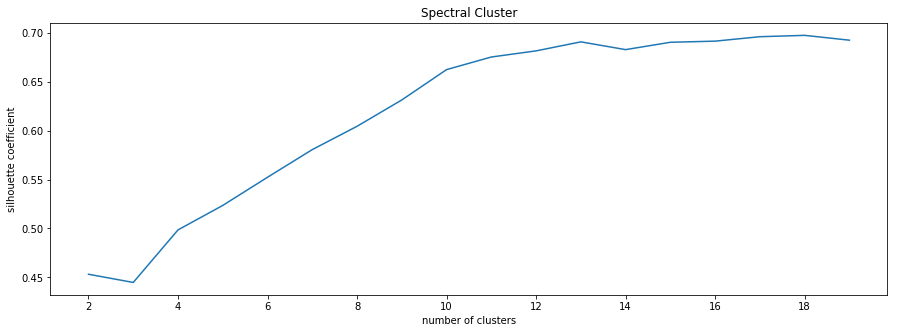

In [56]:
Sil_coefs = []
for k in range(2,20):
    sc = SpectralClustering(n_clusters = k)
    sc.fit(teaflavdf)
    labels = sc.labels_
    Sil_coefs.append(metrics.silhouette_score(teaflavdf, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_title('Spectral Cluster')
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=2))

([<matplotlib.axis.XTick at 0x1a11133a90>,
 <a list of 9 Text xticklabel objects>)

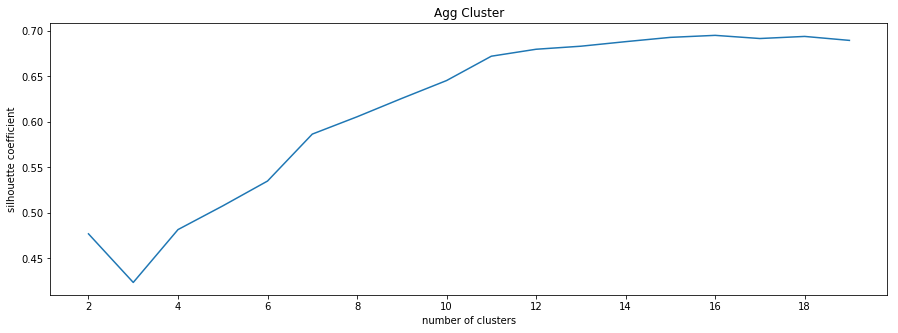

In [55]:
Sil_coefs = []
for k in range(2,20):
    ac = AgglomerativeClustering(n_clusters = k)
    ac.fit(teaflavdf)
    labels = ac.labels_
    Sil_coefs.append(metrics.silhouette_score(teaflavdf, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
ax1.set_title('Agg Cluster')
plt.xticks(np.arange(2, 20, step=2))

In [52]:
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(teaflavdf)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(teaflavdf, labels, metric='euclidean'))

([<matplotlib.axis.XTick at 0x1a18e090b8>,
 <a list of 9 Text xticklabel objects>)

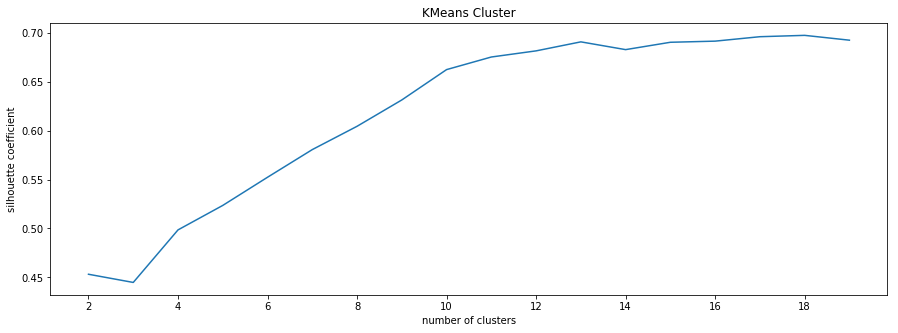

In [57]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_title('KMeans Cluster')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=2))


### Flavor Profile PCA

In [12]:
teadf = teadf.set_index('Tea Name')

NameError: name 'teadf' is not defined

In [50]:
reviewvect = vect.fit_transform(teadf[['Reviews Supertext','Tea Flavors']])
#flavvect = vect.fit_transform(teadf['Tea Flavors'])

ValueError: max_df corresponds to < documents than min_df

In [ ]:
pd.DataFrame(reviewvect.toarray(), index=example, columns=vectorizer.get_feature_names()).head(10)
dtm = dtm.asfptype()

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [91]:
principalComponents = pca.fit_transform(teaflavdf)
X = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Text(0,0.5,'PC2')

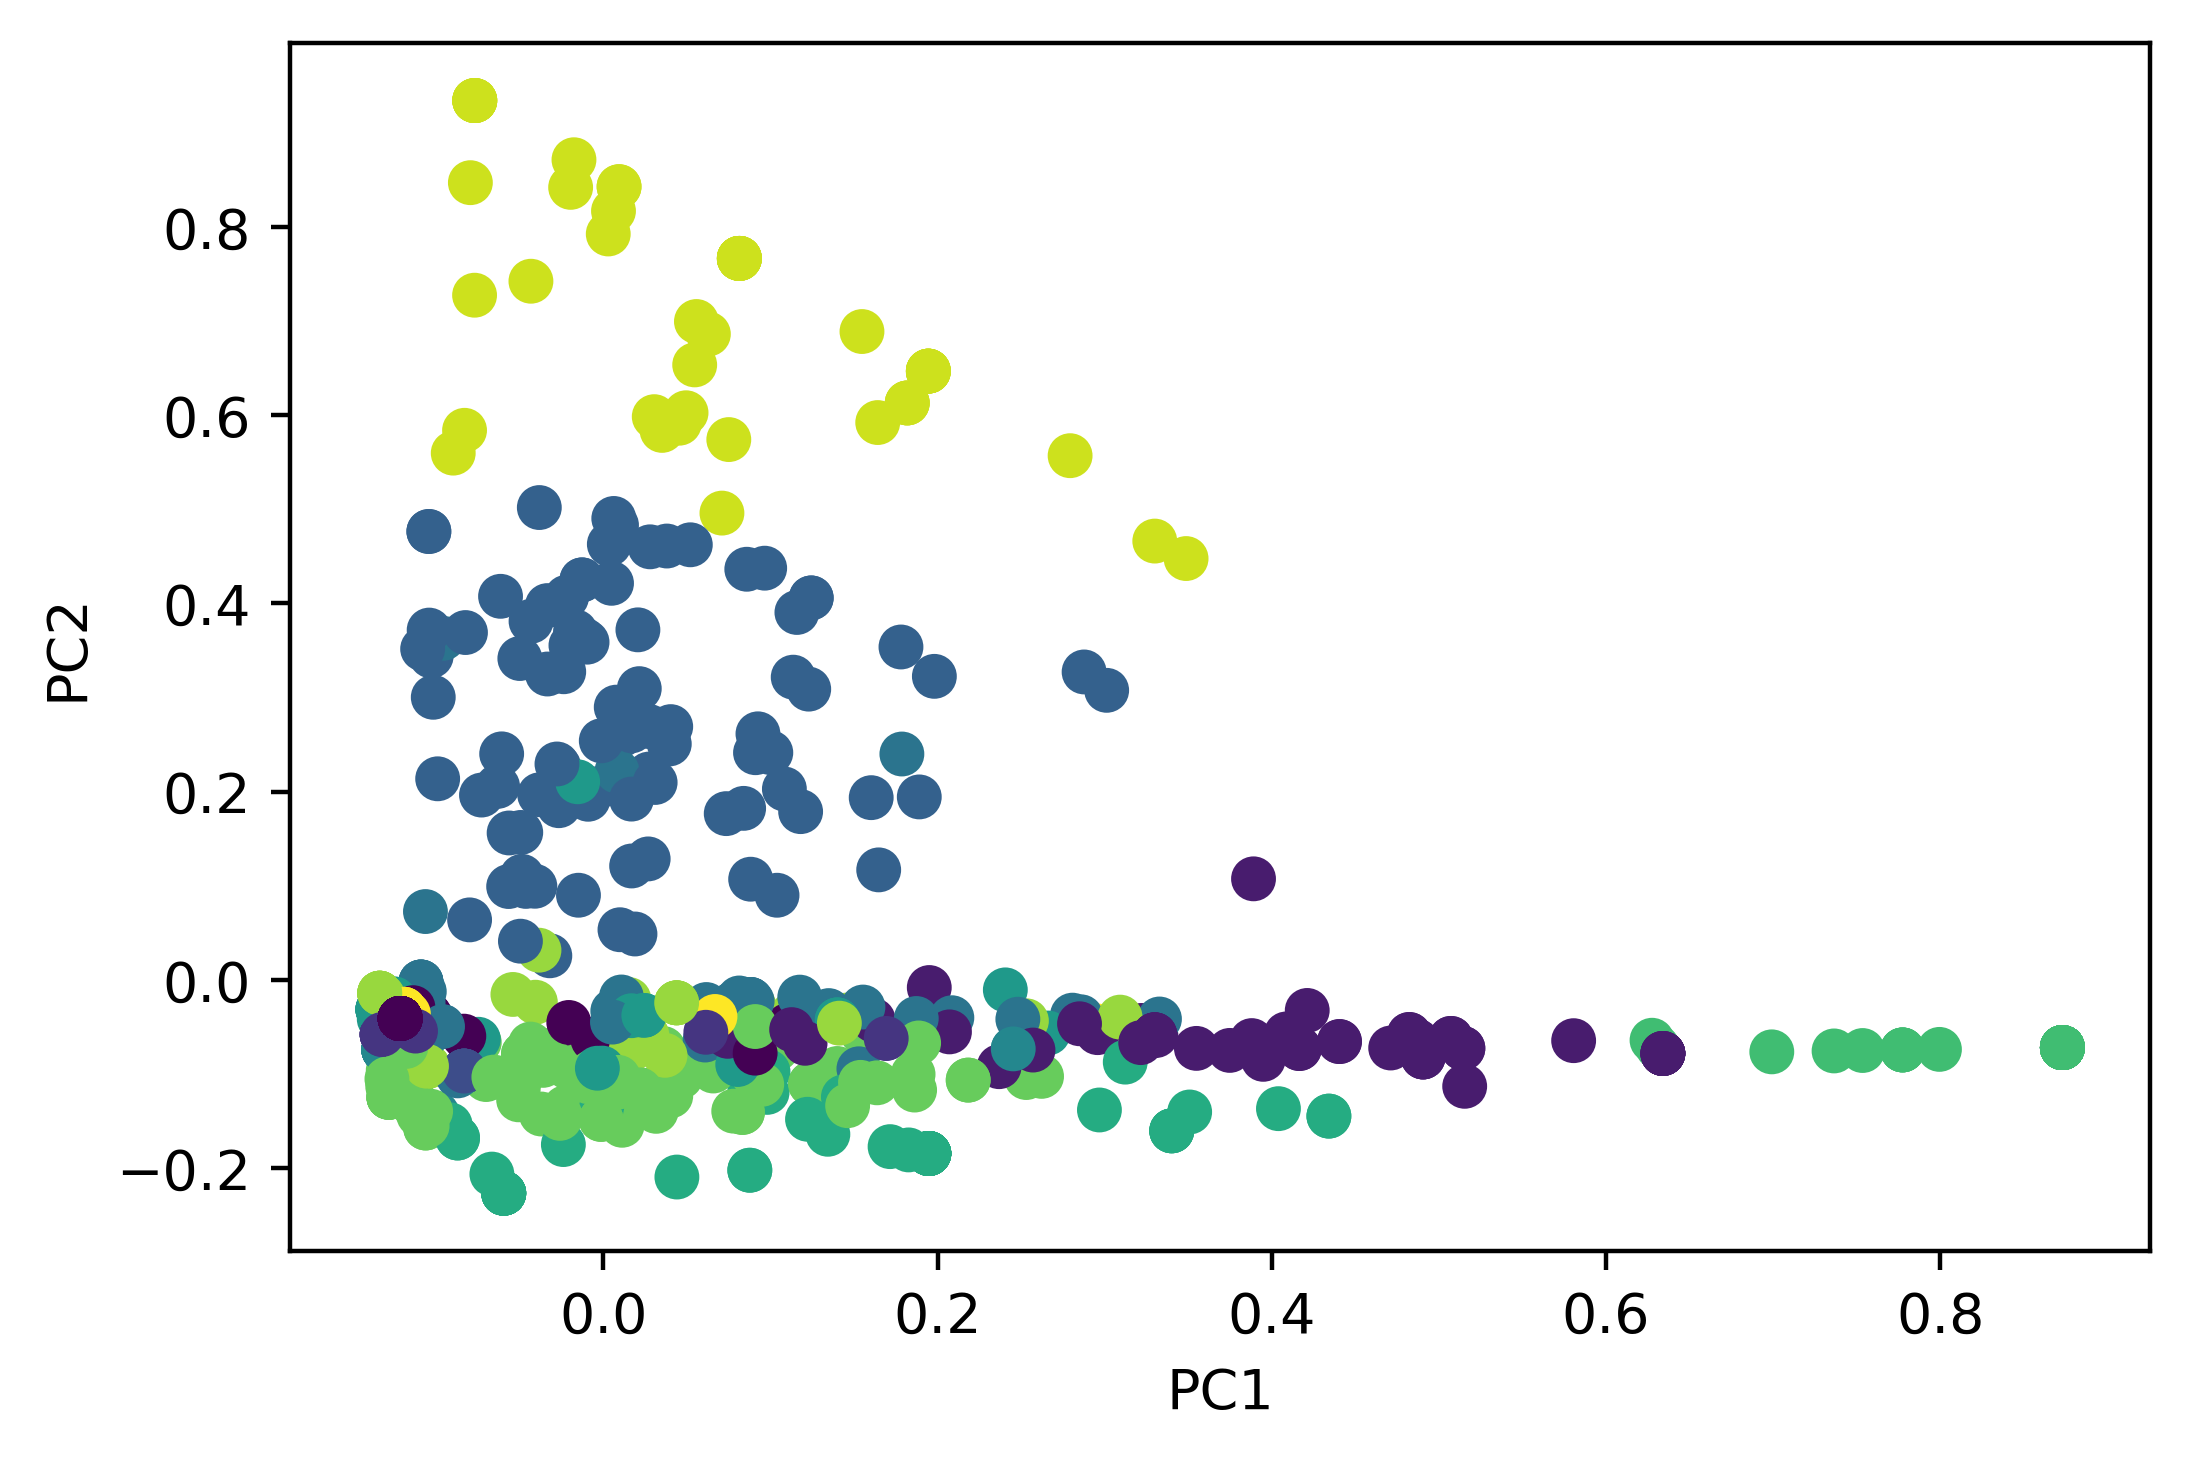

In [92]:
plt.scatter(X['principal component 1'], X['principal component 2'], c=kmlabels, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.xlabel('PC1')
plt.ylabel('PC2')

In [93]:
principalDf.columns

NameError: name 'principalDf' is not defined

## SVD with Surprise

In [159]:
import pandas as pd

from surprise import NormalPredictor
from surprise import SVDpp,SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [160]:
userdf.head()

tea links  \
/Megan       [/teas/tazo/144-berryblossom-white, /teas/adag...   
/gongfugirl  [/teas/tazo/144-berryblossom-white, /teas/adag...   
/nerditea    [/teas/tazo/144-berryblossom-white, /teas/adag...   
/selina      [/teas/tazo/144-berryblossom-white, /teas/adag...   
/cretcre     [/teas/tazo/144-berryblossom-white, /teas/adag...   

                                                     Tea Names  \
/Megan       [Berryblossom White, Blood Orange, Cinnamon Ap...   
/gongfugirl  [Yunnan Golden Buds, Jade Cloud, Ancient Emera...   
/nerditea    [Tung Ting Jade, Organic Cherry Blossom White ...   
/selina      [Green Tea Mint, Tea's Tea Golden Oolong, Vani...   
/cretcre                                      [Pu-erh Classic]   

                                                         Score  
/Megan       [/span, 80, /span, 75, 72, 70, 75, 75, 79, 25,...  
/gongfugirl  [/span, /span, /span, /span, /span, /span, /sp...  
/nerditea    [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...  
/selina                                 [/span, 75, 75, /span]  
/cretcre                                                  [75]

In [161]:
teascore_list=[]
teauser_list=[]
teaname_list=[]
        
for user,i in zip(userdf['Tea Names'], userdf.index):
    for ind,j in enumerate(user):
        teascore= userdf.loc[i,'Score'][ind]
        if teascore=='/span':
            teascore=0
        teascore_list.append(teascore)
        teauser_list.append(i)
        teaname_list.append(re.sub('[!@#$\'\",]', '', j))
newdf=pd.DataFrame({'Tea Name': teaname_list,
     'Score': teascore_list,
     'User Name': teauser_list
    })

In [15]:
"""with open('surprise_data.pkl', 'wb') as picklefile:
    pickle.dump(newdf, picklefile)"""

In [176]:
#adding names and classes from survey
names = ['maya','THE Jonathan', 'Kelly', 'Amy', 'Sakura', 'Dan','Anonymous','Travis', 'Chad', 'the_og_jonathan','Vicky', 'Cyrus', 'Deven']
teas = ['Irish Breakfast','Earl Grey', 'Pre Rain Organic Dragon Well Supreme (Long Jing)', 'supreme pu-erh', 'Loose leaf white teas', 'Gyokuro', 'Chai',\
        'Peppermint Tea', 'chamomile','rishi tropical hibiscus', 'organic english breakfast','jasmine dragon pearls']

In [177]:
teas

['Irish Breakfast',
 'Earl Grey',
 'Pre Rain Organic Dragon Well Supreme (Long Jing)',
 'supreme pu-erh',
 'Loose leaf white teas',
 'Gyokuro',
 'Chai',
 'Peppermint Tea',
 'chamomile',
 'rishi tropical hibiscus',
 'organic english breakfast',
 'jasmine dragon pearls']

In [178]:
#adding classmate scores
classrate=[]
classrate=[[55,95,25,45,0,25,85,90,0,0,0,0],[5,75,95,20,80,25,85,25,25,0,80,0], [75,95,85,85,55,85,65,0,95,0,0,0], \
[95,35,65,0,0,35,5,0,0,85,0,0],[95,75,65,55,45,55,15,0,0,0,0,0],[45,55,55,15,15,55,65,75,0,0,0,0],\
[95,95,0,15,0,0,95,0,0,0,0,0], [95,95,25,35,0,25,75,0,0,0,95,0], [55,65,85,0,95,75,45,0,0,0,0,0],\
[55,55,75,45,75,75,95,95,0,0,0,0],[35,35,95,95,45,95,95,0,0,0,0,90],[65,65,55,0,15,85,95,0,0,0,0,0],\
[35,75,86,55,70,85,75,85,85,65,40,90]]

In [179]:
for index,i in enumerate(names):
    for ind, k in enumerate(classrate[index]):
        newdf = pd.concat([newdf,pd.DataFrame([[k,teas[ind], i]], columns = ['Score', 'Tea Name', 'User Name'])], ignore_index=True)
        
        

In [180]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 100))
algo=SVD()
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(newdf[['User Name', 'Tea Name', 'Score']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=4)

{'fit_time': (0.04555702209472656,
  0.05498003959655762,
  0.05887579917907715,
  0.05715203285217285),
 'test_mae': array([31.20532496, 31.68305379, 31.74072126, 31.734695  ]),
 'test_rmse': array([39.8535961 , 40.28864344, 40.35702603, 40.19919217]),
 'test_time': (0.08518195152282715,
  0.07975506782531738,
  0.09041595458984375,
  0.08346390724182129)}

In [181]:
#SVD is a better predictor, albeit still a bit off
cross_validate(algo, data, cv=4)

{'fit_time': (2.4255664348602295,
  2.5014889240264893,
  2.4796500205993652,
  2.479733943939209),
 'test_mae': array([12.29423384, 12.39943752, 12.14755533, 12.2561775 ]),
 'test_rmse': array([21.61054491, 21.62706044, 21.31695822, 21.33832574]),
 'test_time': (0.08573508262634277,
  0.09709692001342773,
  0.09483599662780762,
  0.08347415924072266)}

In [182]:
from collections import defaultdict
def get_top_n(predictions, n=3):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [183]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [184]:
#generating predictions for unrated teas based on what users have rated
testset = trainset.build_anti_testset()
predictions = algo.test(testset)



In [185]:
want= []
for i in predictions:
    if i[0] in names:
        want.append(i)

In [186]:
top_n = get_top_n(want, n=3)


In [ ]:
top

In [188]:
recsdf = pd.DataFrame(top_n)

In [189]:
recsdf

Amy         Anonymous  \
0                       (Carävan, 94.23915285920242)  (Lady Grey, 100)   
1            (Sun and Cloud Mist, 94.02637625480472)     (Ginger, 100)   
2  (Darjeeling Margarets Hope Second Flush, 92.10...    (Rooibos, 100)   

                                                Chad  \
0              (Wild-Picked Yunnan Jin Jun Mei, 100)   
1  (2012 Spring Nonpareil Mt. Wudong Song Variety...   
2        (Rose Red Premium Black, 98.95152550308386)   

                                         Cyrus  \
0                (Chamomile, 96.9367905854914)   
1  (Earl Grey (loose leaf), 96.87164826373106)   
2        (Coco Chai Rooibos, 96.3932310218901)   

                                                 Dan  \
0                    (Peppermint, 92.71979161853267)   
1                (Fantasy Island, 90.34994074367634)   
2  (Jasmine Silver Needle White Tea, 89.581224376...   

                                      Deven                      Kelly  \
0       (Caramel Matcha, 91.07053029011499)     (Candy Cane Lane, 100)   
1  (Dragon Pearl Jasmine, 86.6733677518014)  (Kava Stress Relief, 100)   
2          (Jungle Ju Ju, 85.1478618224498)      (Immortal Green, 100)   

                                    Sakura  \
0   (Snow White Needle, 97.44263929027667)   
1  (Sun and Cloud Mist, 95.65046854827895)   
2       (Thé des Moines, 93.4008069487642)   

                                 THE Jonathan                 Travis  \
0         (Candy Cane Lane, 96.4798211963304)    (Coconut Chai, 100)   
1  (Zhu Rong Yunnan Black, 95.91862180909203)         (Carävan, 100)   
2        (Brazilian Fruit, 95.46440471752771)  (Echinacea Plus, 100)   

                      Vicky  \
0  (Organic Earl Grey, 100)   
1  (Coco Chai Rooibos, 100)   
2       (Jungle Ju Ju, 100)   

                                                maya  \
0  (Lapsang Souchong Smoky Black Tea (Yan Xun Zhe...   
1                                 (Jasmine Tea, 100)   
2                (Rhubarb Oolong, 98.17258745559928)   

                          the_og_jonathan  
0  (Jasmine Silver Needle White Tea, 100)  
1                  (Brazilian Fruit, 100)  
2            (Cranberry Pomegranate, 100)

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
stop_words = stop_words + ['the','i','I','a','of',')','\'', 'to', 'it','and','is','this','for', 'but', 'that', 'in', 'my', 'not','husband',\
            'be', 'we', 'are', 'm', 'as', 'just', 'there', 'you','all','with','me', 'few', 'will', 'on','has', 'was','many','last'\
              '''()''', "'",'!','.','It',',', '-',':','Thanksgiving','tea','Im','youll','Ive','Its','Also','A','As','This','cant','anybody',\
               'go','one','everybody','dont', 'We', 'us', 'got', 'And']

In [25]:
#adding flavor profiles to allow for a hybrid approach
newdictlist = []
dict2={}
totsteareviews = []
for j in tea_list:
    flavtext = ''
    reviewtext=''
    dict2={}
    adjlist=[]
    flavs = []
    reviewtext, mouthfeel= getReviews(j['Tea Reviews'])
    proportions, adjlist = getProp(reviewtext)
    if j['Tea Flavors']!='<dd class="empty">Not available':
        flavtext = j['Tea Flavors']
        custproportions, flavs= getProp(flavtext)
        dict2['Flavor Profile Cust']=custproportions
    else: 
        dict2['Flavor Profile Cust']=0
    dict2['Review Adj'] = adjlist+flavs
    dict2['Tea Name'] = j['Tea Name']
    dict2['Mouthfeel']=mouthfeel
    dict2['Flavor Profile Reviews']=proportions
    dict2['Reviews Supertext']=reviewtext
    totsteareviews.append(reviewtext)
    newdictlist.append(dict2)


In [27]:
"""#saving list as it takes forever for it to run
with open("newdatalist.pkl", 'wb') as picklefile: 
    pickle.dump(newdictlist,picklefile)"""

In [38]:
#reading in the list of users
with open('/Users/deven/Documents/pickleddata/projectfletcher/newdatalist.pkl', 'rb') as picklefile:
    newdictlist = pickle.load(picklefile)

In [39]:
newteaprofiledf = pd.DataFrame(newdictlist)

In [197]:
#flavor profile Cust is the most accurate
newteaprofiledf.head()

Flavor Profile Cust                             Flavor Profile Reviews  \
0                   0  {'Spicy': 0.0, 'Char': 0.0, 'Sweet': 0.0, 'Nut...   
1                   0  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
2                   0  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
3                   0  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   
4                   0  {'Spicy': 0, 'Char': 0, 'Sweet': 0, 'Nutty': 0...   

  Mouthfeel                                         Review Adj  \
0        []  [rich, pu, erh, teaopias, little, selection, p...   
1        []  [smooth, nice, nutty, taste, aroma, great, din...   
2        []                                            [grand]   
3        []  [ive, first, zingermans, product, fair, right,...   
4        []  [cest, effectivement, un, bon, puerh, velouté,...   

                                   Reviews Supertext  \
0   A very rich tasting pu erh  Teaopias little s...   
1   Smooth with a nice nutty taste and aroma  Gre...   
2                                             Grand    
3   Sadly I think Ive just encountered the first ...   
4   Cest effectivement un bon Puerh velouté gras ...   

                     Tea Name  
0              Tuo Cha Pu-erh  
1  Genmaicha "Brown Rice Tea"  
2            Lapsang Souchong  
3             Moonlight White  
4        Pu Er Vrac 28 (1998)

## Hybrid Model

Creating a linear regresssion model to predict the 'actual' predicted rating of teas to counter the 'cold start up' problem in collaborative recommendation systems.

In [185]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [181]:
#initializing the get functions to find nearest points
def Rec(labels, clstr,cust):
    clustlist = []
    tearecs=[]
    teaind=[]
    for ind, i in enumerate(labels):
        if i ==clstr:
            clustlist.append(ind)
    newdf= playset.iloc[clustlist,:]
    for i in range(len(newdf)):
        tearecs.append((newdf.index[i],sum(euclidean_distances([newdf.iloc[i,:]], [cust]))/len(euclidean_distances([newdf.iloc[i,:]], [cust]))))
    mindist = sorted(tearecs)
    return tearecs
def getTeaNames(tearec):
    teanames = []
    mindist = sorted(tearec, key=lambda x:x[1])
    teanames = [w[0] for w in mindist[:3]]
    teanames = teadf.iloc[teanames,:]['Tea Name']
    return teanames

In [ ]:
top_n[]

In [207]:
#trying to find which of the top 10 are closest to the other teas the user has tried, based on average, may need to rethink this 
avetearate = []
tearate = 0
count=0
flag=0
for i in top_n:
    for k in top_n[i]:
        userrecs = newdf[newdf['User Name']==i]['Tea Name']
        avetearate=[]
        if len(userrecs) <5:
            if flag==1:
                break
            count=0
            for i in userrecs['Tea Name']:
                eudis=(euclidean_distances(newteaprofiledf[newteaprofiledf['Tea Name']==i]['Flavor Profile Reviews'], newteaprofiledf[newteaprofiledf['Tea Name']==k[0]]['Flavor Profile Reviews']))
                tearate +=eudis
                count+=1
            avetearate.append((tearate/count))
            tearate=0
        flag=1

In [186]:
df1 = newteaprofiledf[['Tea Name', 'Flavor Profile Cust']]

In [187]:
hybrid1 = pd.merge(newdf,df1,how='inner')

In [188]:
newcols=[]
for i in hybrid1['Flavor Profile Cust']:
    newcols.append(i)

In [189]:
inter = pd.DataFrame(newcols)
print(len(inter))
print(len(hybrid1))

201796
201796


In [190]:
hybrid1 = pd.concat([hybrid1, inter], axis=1)

In [191]:
hybrid1.drop('Flavor Profile Cust', inplace=True, axis=1)

In [192]:
hybrid1.head()

Score            Tea Name  User Name  Berry  Char  Citrus  Earth  Floral  \
0     0  Berryblossom White     /Megan    0.0   0.0     0.0    0.0     0.0   
1     0  Berryblossom White   /milktea    0.0   0.0     0.0    0.0     0.0   
2     0  Berryblossom White  /lfiske29    0.0   0.0     0.0    0.0     0.0   
3    75  Berryblossom White    /analee    0.0   0.0     0.0    0.0     0.0   
4    75  Berryblossom White   /bdragon    0.0   0.0     0.0    0.0     0.0   

   Grass  Herbs  Malolactic  Marine  Mineral  Nutty  Spicy  Sweet  Tree Fruit  \
0    0.0    0.0         0.0     0.0      0.0    0.0    0.0    0.0         0.0   
1    0.0    0.0         0.0     0.0      0.0    0.0    0.0    0.0         0.0   
2    0.0    0.0         0.0     0.0      0.0    0.0    0.0    0.0         0.0   
3    0.0    0.0         0.0     0.0      0.0    0.0    0.0    0.0         0.0   
4    0.0    0.0         0.0     0.0      0.0    0.0    0.0    0.0         0.0   

   Tropical  Vegetables  Wood  
0       0.0         0.0   0.0  
1       0.0         0.0   0.0  
2       0.0         0.0   0.0  
3       0.0         0.0   0.0  
4       0.0         0.0   0.0

In [193]:
algopredicts = []
for i,k in zip(hybrid1['Tea Name'],hybrid1['User Name']):
    algopredicts.append(round(algo.predict(k, i).est))

In [194]:
hybrid1['Algo']=algopredicts

In [195]:
hybrid1.sample(10)

Score               Tea Name        User Name  Berry      Char  Citrus  \
74254     31              Earl Grey        /Alana237    0.0  0.166667     0.0   
140208    84            White Peony           /Meeka    0.0  0.000000     0.0   
116845    83  Emperor's 7 Treasures    /The_Tea_Show    0.0  0.000000     0.0   
132641    97         Jasmine Pearls           /Rijje    0.0  0.000000     0.0   
124288    83       Lapsang Souchong          /VegTea    0.0  0.000000     0.0   
24175     80      English Breakfast      /skittlefox    0.0  0.000000     0.0   
56125     67              Earl Grey         /coral23    0.0  0.000000     0.0   
94339     82          Golden Monkey          /owense    0.0  0.000000     0.0   
127417    60       Lapsang Souchong      /AmandaEarl    0.0  0.000000     0.0   
52870     79              Earl Grey  /elysian_voices    0.0  0.000000     0.0   

        Earth    Floral  Grass  Herbs  ...   Marine  Mineral  Nutty     Spicy  \
74254     0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.083333   
140208    0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
116845    0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
132641    0.0  0.769231    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
124288    0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
24175     0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
56125     0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
94339     0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  1.000000   
127417    0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   
52870     0.0  0.000000    0.0    0.0  ...      0.0      0.0    0.0  0.000000   

           Sweet  Tree Fruit  Tropical  Vegetables  Wood  Algo  
74254   0.750000         0.0       0.0         0.0   0.0  31.0  
140208  0.000000         0.0       0.0         0.0   0.0  84.0  
116845  0.000000         1.0       0.0         0.0   0.0  83.0  
132641  0.230769         0.0       0.0         0.0   0.0  97.0  
124288  0.000000         0.0       0.0         0.0   0.0  83.0  
24175   0.000000         0.0       0.0         0.0   0.0  67.0  
56125   0.000000         0.0       0.0         0.0   0.0  84.0  
94339   0.000000         0.0       0.0         0.0   0.0  76.0  
127417  0.000000         0.0       0.0         0.0   0.0  60.0  
52870   0.000000         0.0       0.0         0.0   0.0  65.0  

[10 rows x 21 columns]

In [196]:
hybrid1['Algo'] = preprocessing.scale(hybrid1['Algo'])

In [197]:
hybrid1['Score'] = preprocessing.scale(hybrid1['Score'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [198]:
y = hybrid1['Score']
X = hybrid1.drop(['Tea Name','User Name','Score'], axis=1)

In [199]:
lr = LinearRegression()
lg = LogisticRegression()

In [169]:
#hybriddf = pd.DataFeame(predictions)

In [170]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.3, random_state=8)

In [176]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
#lg.fit(xtrain,ytrain)

In [178]:
lr.score(xtest, ytest)

0.8300688780812415

In [172]:
est =  ElasticNetCV(l1_ratio = .15, cv=20, n_alphas= 200)
est.fit(xtrain,ytrain)
est.score(xtest,ytest)

0.8299847223162434

In [173]:
#Getting multiplicative error to see my models absolute fit
rms = math.sqrt(mean_squared_error(ytest, est.predict(xtest)))
math.exp(rms)

239306.18275680725

In [179]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
        
    pred = lr.predict(x)
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [204]:
#Checking residuals and quantile plots
#diagnostic_plot(xtest, ytest)

## Doc2Vec

Experimenting with Doc2vec to see if there is any relation between tea reviews based on tea type.

In [43]:
import gensim
import os
import collections
import smart_open
import random


In [215]:
itemdf.head()

Tea Brand                      Tea Flavors Tea Ingredients  \
0            Teaopia  <dd class="empty">Not available   Not available   
1         Narian Tea  <dd class="empty">Not available   Not available   
2           Bewley's  <dd class="empty">Not available   Not available   
3        Zingerman's  <dd class="empty">Not available   Not available   
4  Maison des 3 Thes  <dd class="empty">Not available   Not available   

                     Tea Name  \
0              Tuo Cha Pu-erh   
1  Genmaicha "Brown Rice Tea"   
2            Lapsang Souchong   
3             Moonlight White   
4        Pu Er Vrac 28 (1998)   

                                         Tea Reviews    Tea Type  
0  [A very rich tasting pu-erh. Teaopia’s little ...  Pu-erh Tea  
1  [Smooth with a nice nutty taste and aroma. Gre...   Green Tea  
2                                           [Grand.]   Black Tea  
3  [Sadly I think I’ve just encountered the first...   White Tea  
4  [C’est effectivement un bon Puerh, velouté, gr...  Pu-erh Tea

In [27]:
train=[]
test=[]
words=''
def read_corpus(fname, tokens_only=False):
    for i in fname:
        for k,line in enumerate(i):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                # For training data, add tags
                if len(gensim.utils.simple_preprocess(line))<50:
                    yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [k])

In [217]:
len(gensim.utils.simple_preprocess(itemdf['Tea Reviews'][0][0]))

75

In [218]:
train = itemdf['Tea Reviews'][:round(len(itemdf)*.8)]
test = itemdf['Tea Reviews'][-round((len(itemdf)*.2)):]

In [219]:
train[0]

['A very rich tasting pu-erh. Teaopia’s little selection of pu-erh left me a bit skeptical, but I’m glad I gave this a try. The taste is earthy, with slight orangy undertones on the first infusion. The true orangy taste comes out on the second infusion. Definitely recommend this to any person who likes a strong cup of Black Tea, and who doesn’t mind something a little stronger than Orange Pekoe, and Yunan.The tea is also extremely high in Vitamin C.',
 'I think this has been discontinued. I don’t mind that.Steeped for seven minutes (not the “proper” way to do Pu-erh, but it’s the way I personally like all the other ones I’ve tried. Maybe I’ll give it another try and steep for far less time.None of the conspicuous fishiness that some have, but none of the complexity either. Tastes like soil and campfire ashes. A bit of sweetness in the smell and a smaller bit in the taste. Decent but nothing special.']

In [220]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=55)

In [223]:
train_corpus = list(read_corpus(train))
test_corpus = list(read_corpus(test, tokens_only=True))
model.build_vocab(train_corpus)

In [224]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (5269): «sil sample sipdown of the day this is an interesting tea the main flavor getting is toasty rice breakfast cereal or sweet rice crispy treat with salted butter also thinking of payday bar type confection with the rich caramel center only with toasted rice on the outside instead of peanuts it is tasty thanks sil»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d50,n5,w5,mc2,s0.001,t3):

MOST (3, 0.30476072430610657): «brewed in small teapot cl good pu erh»

MEDIAN (19, -0.0011895745992660522): «smoky up front and aroma really nice flavor that finishes with chocolate»

LEAST (11, -0.26107388734817505): «here hoping ttb round this is an elixir»



In [38]:
#model.save('teadocmodel.bin')
model = gensim.models.doc2vec.Doc2Vec.load('teadocmodel.bin')

## Doc2Vec with Books

Using doc to vec to see if I can recommend books based on tea flavor profiles. 

In [190]:
books = nltk.corpus.gutenberg.fileids()

In [191]:
bookt = ['Emma by Jane Austen', 'Persuassion by Jane Austen', 'Sense and Sensibility by Jane Austen',\
        'Poems by William Blake', 'The Little People of the Snow by William Bryant', 'The Adventures of Buster Bear by Thornton Burgress'\
        'Alice in Wonderland by Lewis Carroll','The Ball and the Cross by G.K. Chesterton','The Wisdom of Father Brown by G.K. Chesterton'\
        'The Ball and the Cross by G.K. Chesterton', 'The Parents Assistant by Maria Edgeworth','Moby Dick by Herman Melville',\
        'Paradise Lost by John Milton', 'Shakespeares Works','Shakespeares Works','Shakespeares Works', 'Leaves of Grass by Walt Whitman']

In [192]:
beat = {}
for i,k in zip(books, bookt):
    beat[i]=k

In [193]:
doclen = []
train = []
def read_corpus1(fname, tokens_only=False):
    for i in fname:
        for k,line in enumerate(i):
            if tokens_only:
                train.append(gensim.utils.simple_preprocess(line))
            else:
                # For training data, add tags
                if len(gensim.utils.simple_preprocess(line))<50:
                    train.append(gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [k]))
        doclen.append(k)
    return train, doclen

In [194]:
bookrec = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=55)

In [195]:
bookwords=[]
for i in books:
    book = ' '.join(nltk.corpus.gutenberg.words(i))
    bookwords.append(book)

In [198]:
btrain,doclen = list(read_corpus1(bookwords))
test_corpus = newteaprofiledf['Review Adj'].values

KeyboardInterrupt: 

In [200]:
with open('/Users/deven/Documents/pickleddata/projectfletcher/btrain.pkl', 'rb') as picklefile:
    btrain = pickle.load(picklefile)

In [71]:
bookrec.build_vocab(btrain)

In [203]:
bookrec = gensim.models.doc2vec.Doc2Vec.load('/Users/deven/Documents/pickleddata/projectfletcher/bookrec.bin')

In [73]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = bookrec.infer_vector(test_corpus[doc_id])
sims = bookrec.docvecs.most_similar([inferred_vector])

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % bookrec)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2)]:
    print(u'%s %s: \n' % (label, sims[index]))

Test Document (1470): «black friday della terra order orders herbal infusions way lupicia tea caramel rum rooibos ive liked bags resealable little colored clips bags huge cup tea morning little “ snowflakes little pieces rock sugar thats theyre cute black teas nice cup apricot creaminess real apricot peach apricot little astringent guess stick minutes next time bit cookie base teanot sure little pastry quality overall im happy cupboard teabag free sample lupicia newsletter white tea harney version flavored black tea likeable tea opinion other reviews stellar lighter black tea base flavor notes white cocoa apricot subtle present lot black teas additions good plain good additions more more tea hope collection well hee hee woot blog muhahahahha pictures review href= http//oolongowl wordpress com/2013/01/13/white christmas lupicia tea review/ rel= nofollow target= _blank wordpress com/2013/01/13/white christmas lupicia tea review/ < /a > fyi tea im reviewing bagged form flavor loose leaf d

In [195]:
tot=0
for ind, i in enumerate(doclen):
    tot+=i
    if sims[0][0]==btrain[ind][1]:
        rec = nltk.corpus.gutenberg.fileids()[ind-1]
        break
print(rec)

austen-persuasion.txt


In [232]:
def getBookrec(iid):
    test_corpus = newteaprofiledf[newteaprofiledf['Tea Name']==iid]['Review Adj'].values[0]
    inferred_vector = bookrec.infer_vector(test_corpus)
    sims = bookrec.docvecs.most_similar([inferred_vector])
    rec=''
    tot=0
    for ind, i in enumerate(doclen):
        tot+=i
        if sims[0][0]<tot:
            rec = bookt[ind-1]
            break
    return rec,

In [ ]:
bookreclist = []
for i in names:
    teaid= top_n[i][0][0]
    bookreclist.append(getBookrec(teaid))

In [ ]:
bookreclist

In [223]:
bookreclist

['', '', '', '', '', '', '', '', '', '', '', '', '']

In [72]:
#bookrec.save('bookrec.bin')


## LDA Books

Trying the recommendation system with LDA for recommending books.

In [ ]:
from gensim import corpora, models, similarities, matutils

In [ ]:
cv = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=stop_words)
cv.fit(bookwords)
teawords = cv.transform(newteaprofiledf['Review Adj'])

In [ ]:
# Creating matrix, then transposing it so the terms are the rows
counts = cv.transform(bookwords).transpose()

In [ ]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)
compareset = matutils.Sparse2Corpus(teawords)

In [ ]:
#saving mapping for later use
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [ ]:
lda = models.LdaModel(corpus=corpus, num_topics=5, minimum_probability=0.03, id2word=id2word, passes=10)

In [ ]:
lda = models.LdaModel(corpus=corpus, num_topics=5, minimum_probability=0.03, id2word=id2word, passes=10)

In [ ]:
lda.print_topics()

In [ ]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [ ]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [ ]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[:]

## Word2Vec

Tryign my hand at word to vec to see if it will work for a NLP analysis of reviews.

In [55]:
allwords = nltk.corpus.gutenberg.words()

In [56]:
len(allwords)

2621613

In [40]:
def read_corpus(fname):
    for i in fname:
        for line in i:
            if len(gensim.utils.simple_preprocess(line))<50:
                 yield [x for x in gensim.utils.simple_preprocess(line) if len(x)>2]

In [41]:
train_corpus = list(read_corpus(train))
test_corpus = list(read_corpus(test))

In [47]:
len(train_corpus)

14742

In [42]:
model1 = gensim.models.Word2Vec(train_corpus, size=100, window=5, min_count=1, workers=4,sg=1)

In [43]:
#model1.save('teawordmodel.bin')
model1 = gensim.models.word2vec.Word2Vec.load('teawordmodel.bin')

In [44]:
list(model.wv.vocab.items())[:7]


[('smooth', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d2da0>),
 ('with', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d2e80>),
 ('nice', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d2ef0>),
 ('nutty', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d2f60>),
 ('taste', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d2fd0>),
 ('and', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d3080>),
 ('aroma', <gensim.models.keyedvectors.Vocab at 0x7fdc5e5d30f0>)]

In [168]:
print(model['bright'])

[ 0.26282308  0.0071149  -0.32430422  0.59724134 -0.7426681   0.18655002
 -0.4038503   0.20071149  0.10153158  0.13714272  0.9464922   0.251725
 -0.00443782  0.3766225  -0.09499691  0.21177296 -0.24743696 -0.42857227
 -0.3706208   0.23413515 -0.03420123 -0.12118118  0.13753308  0.16152819
  0.10536534  0.3216614  -0.4256198   0.31120932 -0.11183512  0.23259494
 -0.44097415 -0.04700734  0.06182436  0.45268473 -0.04672055  0.1599666
 -0.0781556  -0.3519306  -0.18542793  0.14679779 -0.09078766 -0.2867616
 -0.07354321 -0.16828202 -0.10133737 -0.24167432  0.07331157 -0.23129578
  0.09024661  0.14577837 -0.24345677  0.18744776 -0.29013866 -0.19038413
  0.19240302  0.35977903 -0.3932845  -0.24348474 -0.67159015 -0.18261594
  0.15607007  0.2930961  -0.12427971 -0.07167553  0.22015439 -0.03550098
  0.12284525  0.07469108  0.3350976   0.18062271  0.02506146  0.15866792
  0.21678075 -0.0064411   0.14050026  0.3195261  -0.17252949 -0.02385203
 -0.5520763  -0.18586099  0.3122406   0.26884246  0.061

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [49]:
# Similarity
model.most_similar('mouthfeel' ,topn=8)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('mudslide', 0.4350031912326813),
 ('forgettable', 0.4283635914325714),
 ('require', 0.4157447814941406),
 ('hermetically', 0.41437584161758423),
 ('true', 0.412415087223053),
 ('stayed', 0.41060155630111694),
 ('lecker', 0.4095308482646942),
 ('advertising', 0.4066983163356781)]

In [50]:
model.similarity('green','tea')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.31707171922843985

In [ ]:
model.n_similarity(['bread', 'dog'], ['cat', 'dog'])

In [ ]:
model.doesnt_match("rabbit cow raven turtle".split())

## Creating wrappers

Creating a list of wrappers to copy into a JS file for flask app.

In [196]:
#Giving wrappers a try
def p_decorate(func):
   def func_wrapper(name):
       return "{"+func(name)+"},"
   return func_wrapper
@p_decorate
def getval(string):
    return 'value: +{0}+,'.format(string)+'\n'+' text: +{0}+'.format(string)
convert_text = p_decorate(getval)

In [197]:
def loopit(list1):
    new_list = []
    for i in list1:
        new_list.append(getval(i))
        
    return new_list

In [198]:
uniteas = loopit(itemdf['Tea Name'].unique())

In [199]:
from pprint import pprint
pprint(uniteas)

['{value: +Tuo Cha Pu-erh+,\n text: +Tuo Cha Pu-erh+},',
 '{value: +Genmaicha Brown Rice Tea+,\n text: +Genmaicha Brown Rice Tea+},',
 '{value: +Lapsang Souchong+,\n text: +Lapsang Souchong+},',
 '{value: +Moonlight White+,\n text: +Moonlight White+},',
 '{value: +Pu Er Vrac 28 (1998)+,\n text: +Pu Er Vrac 28 (1998)+},',
 '{value: +Dong Fang Hong Wudong+,\n text: +Dong Fang Hong Wudong+},',
 '{value: +Chai Matcha+,\n text: +Chai Matcha+},',
 '{value: +Cherry Vanilla+,\n text: +Cherry Vanilla+},',
 '{value: +Houji-cha (Premium Tea Bag)+,\n'
 ' text: +Houji-cha (Premium Tea Bag)+},',
 '{value: +Mint Chocolate Chip Black Tea+,\n'
 ' text: +Mint Chocolate Chip Black Tea+},',
 '{value: +Green Tea Plus Glow+,\n text: +Green Tea Plus Glow+},',
 '{value: +Victorian Afternoon Tea+,\n text: +Victorian Afternoon Tea+},',
 '{value: +Aged Tie Guan Yin+,\n text: +Aged Tie Guan Yin+},',
 '{value: +Kenyan Sunrise+,\n text: +Kenyan Sunrise+},',
 '{value: +Nutty for Almonds+,\n text: +Nutty for Almonds+

 '{value: +Rooibos des Amants+,\n text: +Rooibos des Amants+},',
 '{value: +Wu Yi Shui Xian+,\n text: +Wu Yi Shui Xian+},',
 '{value: +Formosa Fancy Oolong Top Grade+,\n'
 ' text: +Formosa Fancy Oolong Top Grade+},',
 '{value: +Ocean of Wisdom+,\n text: +Ocean of Wisdom+},',
 '{value: +Golden Monkey (No. 510)+,\n text: +Golden Monkey (No. 510)+},',
 '{value: +Licorice Spice+,\n text: +Licorice Spice+},',
 '{value: +Cantaloupe Bai Mu Dan+,\n text: +Cantaloupe Bai Mu Dan+},',
 '{value: +Meng Ding Huang Ya+,\n text: +Meng Ding Huang Ya+},',
 '{value: +Sikkim 2nd Flush Temi TGFOP1(BI06)+,\n'
 ' text: +Sikkim 2nd Flush Temi TGFOP1(BI06)+},',
 '{value: +Assam CTC BOP Estate Blend Organic (TA15)+,\n'
 ' text: +Assam CTC BOP Estate Blend Organic (TA15)+},',
 '{value: +Strawberry Oolong+,\n text: +Strawberry Oolong+},',
 '{value: +Red Sunset+,\n text: +Red Sunset+},',
 '{value: +Peach Tranquility+,\n text: +Peach Tranquility+},',
 '{value: +Spring Cherry Green Tea+,\n text: +Spring Cherry Green

 '{value: +Love Spell+,\n text: +Love Spell+},',
 '{value: +Wuyi Yancha [Out of stock]+,\n text: +Wuyi Yancha [Out of stock]+},',
 '{value: +ZY07: Seasons Pick Yunnan Black Snail+,\n'
 ' text: +ZY07: Seasons Pick Yunnan Black Snail+},',
 '{value: +Formosa Green Pi Lo Chun (TT61)+,\n'
 ' text: +Formosa Green Pi Lo Chun (TT61)+},',
 '{value: +Keemun A-Grade+,\n text: +Keemun A-Grade+},',
 '{value: +WaghBakri+,\n text: +WaghBakri+},',
 '{value: +Organic Silver Needle Premium+,\n'
 ' text: +Organic Silver Needle Premium+},',
 '{value: +2012 Special Reserve Green+,\n text: +2012 Special Reserve Green+},',
 '{value: +Jasmine Jazz+,\n text: +Jasmine Jazz+},',
 '{value: +Green Tea with Seaweed+,\n text: +Green Tea with Seaweed+},',
 '{value: +Coconut Chai+,\n text: +Coconut Chai+},',
 '{value: +Maccha au Lait+,\n text: +Maccha au Lait+},',
 '{value: +Diet Partner Wellness Tea+,\n text: +Diet Partner Wellness Tea+},',
 '{value: +Pu-erh Cabernet+,\n text: +Pu-erh Cabernet+},',
 '{value: +Jin Jun

 '{value: +Fabulous Feijoa+,\n text: +Fabulous Feijoa+},',
 '{value: +Irish Morning Tea+,\n text: +Irish Morning Tea+},',
 '{value: +Imperial Golden Monkey (ZP85)+,\n'
 ' text: +Imperial Golden Monkey (ZP85)+},',
 '{value: +Get Smart - No.16 (Wellness Collection)+,\n'
 ' text: +Get Smart - No.16 (Wellness Collection)+},',
 '{value: +Iron Goddess of Mercy (Tie Guanyin)+,\n'
 ' text: +Iron Goddess of Mercy (Tie Guanyin)+},',
 '{value: +Mandarin Jasmine Pearls+,\n text: +Mandarin Jasmine Pearls+},',
 '{value: +Momoko Moon+,\n text: +Momoko Moon+},',
 '{value: +Russian Caravan Original China Blend+,\n'
 ' text: +Russian Caravan Original China Blend+},',
 '{value: +Genmaicha Satsuki+,\n text: +Genmaicha Satsuki+},',
 '{value: +Ayurvedic Passion+,\n text: +Ayurvedic Passion+},',
 '{value: +Ceciliyan Estate FBOPF Ex. Spl.+,\n'
 ' text: +Ceciliyan Estate FBOPF Ex. Spl.+},',
 '{value: +Tomo Sencha+,\n text: +Tomo Sencha+},',
 '{value: +Chá Vermelho Marco Polo+,\n text: +Chá Vermelho Marco Polo+

 '{value: +Chai Masala Tulsi Tea+,\n text: +Chai Masala Tulsi Tea+},',
 '{value: +Organic Blink Bonnie+,\n text: +Organic Blink Bonnie+},',
 '{value: +Sweet and Spicy+,\n text: +Sweet and Spicy+},',
 '{value: +Keemun Hao Ya China+,\n text: +Keemun Hao Ya China+},',
 '{value: +Spicy Romance Ginger-Cinnamon Tisane+,\n'
 ' text: +Spicy Romance Ginger-Cinnamon Tisane+},',
 '{value: +Traditional Masala+,\n text: +Traditional Masala+},',
 '{value: +Splash+,\n text: +Splash+},',
 '{value: +Stormy Night (organic)+,\n text: +Stormy Night (organic)+},',
 '{value: +Ancient Trees Organic Pu-erh+,\n'
 ' text: +Ancient Trees Organic Pu-erh+},',
 '{value: +Yerba Mate Organic+,\n text: +Yerba Mate Organic+},',
 '{value: +Peppermint Herbal Tisane+,\n text: +Peppermint Herbal Tisane+},',
 '{value: +Natural Tanzania+,\n text: +Natural Tanzania+},',
 '{value: +Wild Orange Blossom+,\n text: +Wild Orange Blossom+},',
 '{value: +Organic Spring Twist+,\n text: +Organic Spring Twist+},',
 '{value: +Lemon Chamo